In [1]:
#load data
!git clone https://github.com/fredrikofstad/FL-Appliance-Energy-Prediction-and-Classification

Cloning into 'FL-Appliance-Energy-Prediction-and-Classification'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 301 (delta 173), reused 179 (delta 98), pack-reused 14
Receiving objects: 100% (301/301), 73.88 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (173/173), done.
Updating files: 100% (76/76), done.


In [2]:
#intall timecounter
!pip install ipython-autotime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00


In [3]:
!pip install --upgrade tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 30.5 MB/s eta 0:00:00
     ━━━━

In [1]:
%cd /content/FL-Appliance-Energy-Prediction-and-Classification

/content/FL-Appliance-Energy-Prediction-and-Classification


In [2]:
!pip install tensorboard

In [3]:
!pip install tensorflow

In [4]:
#read CSV files
import pandas as pd
import os

# Directory where your CSV files are located
directory_path = 'data/'  # Replace this with the actual path to your CSV files

# Dictionary to store DataFrames
dataframes = {}
name_list=[]
# Loop through each CSV file and read it into a DataFrame
for i in range(1, 51):
    file_name = f'Consumer{i}.csv'  # Construct the file name
    name_list.append(file_name)
    file_path = os.path.join(directory_path, file_name)  # Full path to the CSV file

    # Read the CSV file into a pandas DataFrame and store it in the dictionary
    dataframes[file_name] = pd.read_csv(file_path)

In [5]:
variables = globals().copy()
for sheet_name, df in dataframes.items():
    variables[sheet_name] = df

In [6]:
variables[name_list[49]]

Unnamed: 0  Periods  AC  Dish washer  Washing Machine  Dryer  \
0               0        1   0          0.0              0.0    0.0   
1               1        2   0          0.0              0.0    0.0   
2               2        3   0          0.0              0.0    0.0   
3               3        4   0          0.0              0.0    0.0   
4               4        5   0          0.0              0.0    0.0   
...           ...      ...  ..          ...              ...    ...   
35131       35131       92   0          0.0              0.0    0.0   
35132       35132       93   0          0.0              0.0    0.0   
35133       35133       94   0          0.0              0.0    0.0   
35134       35134       95   0          0.0              0.0    0.0   
35135       35135       96   0          0.0              0.0    0.0   

       Water heater        TV  Microwave  Kettle  Lighting  Refrigerator  
0             0.000  0.000000        0.0     0.0  0.000000           0.0  
1             0.000  0.000000        0.0     0.0  0.000000           0.0  
2             0.000  0.000000        0.0     0.0  0.000000           0.0  
3             0.000  0.000000        0.0     0.0  0.000000           0.0  
4             0.000  0.000000        0.0     0.0  0.000000           0.0  
...             ...       ...        ...     ...       ...           ...  
35131         0.346  0.046792        0.0     0.0  0.219333           0.0  
35132         0.207  0.047054        0.0     0.0  0.217667           0.0  
35133         0.373  0.046454        0.0     0.0  0.218667           0.0  
35134         0.079  0.000000        0.0     0.0  0.063333           0.0  
35135         0.000  0.000000        0.0     0.0  0.000000           0.0  

[35136 rows x 12 columns]

In [7]:
#process data for classification splitting into test training set as well

#The function devides the dataset into timeseries inputs where each input represents a daily appliance energy consumption for a specific appliance.These inputs are shuffled 
# but before that we assign the correct appliance label to the input which is our output for each input.Further we devide (input,output) into training and test sets.
# 
# The input timeseries has length 96 where each element represents the energy measurement taken every 15 min for that specific appliance.

def func_prep_data_classification(df):
    df = df.iloc[:, 2:]
    num_full_days = len(df) // 96

    # Split the DataFrame into chunks of 96 rows each
    daily_chunks = [df.iloc[i * 96 : (i + 1) * 96] for i in range(num_full_days)]

    import numpy as np

    # Function to convert a DataFrame to a matrix and add a row at the top
    def convert_to_matrix_with_row(df):
        # Convert the DataFrame to a matrix
        data_matrix = df.values

        # Add a row at the top containing integers from 1 to 10
        extra_row = np.arange(1, 11).reshape(1, -1)

        # Concatenate the extra row and the data matrix vertically
        data_matrix_with_row = np.concatenate((extra_row, data_matrix), axis=0)
        return data_matrix_with_row.T

    # Convert each DataFrame in daily_chunks to a matrix with an additional row
    matrices_with_rows = [convert_to_matrix_with_row(df) for df in daily_chunks]

    import numpy as np

    # Generate labels (integer values from 0 to 9)
    labels = np.arange(10)

    # Repeat labels for each day
    labels_concat = np.tile(labels, num_full_days)

    matrices_with_rows_concat = np.vstack(matrices_with_rows)

    num_rows = matrices_with_rows_concat.shape[0]

    # Generate a random shuffling order for the rows
    shuffled_indices = np.arange(num_rows)
    np.random.shuffle(shuffled_indices)

    # Shuffle rows in both matrices based on the same shuffling order
    Input = matrices_with_rows_concat[shuffled_indices]
    Output = labels_concat[shuffled_indices]
    Input = Input[:, 1:]

    import torch

    Input = torch.tensor(Input).unsqueeze(1)
    Output = torch.tensor(Output)

    Input_train = Input[:2300]
    Output_train = Output[:2300]
    Input_test = Input[2300:]
    Output_test = Output[2300:]


    Input_train =  torch.tensor(Input_train)

    Input_test = torch.tensor(Input_test)


    Output_train = torch.tensor(Output_train)
    Output_test = torch.tensor(Output_test)

    return Input_train, Output_train,Input_test, Output_test

In [8]:
#process the all datafiles
classification_processed_data=[func_prep_data_classification(variables[name_list[i]]) for i in range(0,50) ]

<ipython-input-7-e8e1ce3f0beb>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Input_train =  torch.tensor(Input_train)
<ipython-input-7-e8e1ce3f0beb>:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Input_test = torch.tensor(Input_test)
<ipython-input-7-e8e1ce3f0beb>:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Output_train = torch.tensor(Output_train)
<ipython-input-7-e8e1ce3f0beb>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_gr

In [9]:
classification_processed_data[0][0].shape

torch.Size([2300, 1, 96])

In [11]:
#printout of runtime printed in the end of the print
%load_ext autotime
#Federated learning for prediction
import collections
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from matplotlib import pyplot as plt

np.random.seed(4)

input_data_list_train=[classification_processed_data[i][0].numpy() for i in range(50)]
target_data_list_train=[classification_processed_data[i][1].numpy() for i in range(50)]

# Define constants and hyperparameters
NUM_CLIENTS = len(input_data_list_train)
NUM_EPOCHS = 1
BATCH_SIZE = 200
SHUFFLE_BUFFER = 1
PREFETCH_BUFFER = 1
SEQ_LENGTH = 96
INPUT_SIZE = 1
OUTPUT_SIZE = 10

# Create a tf.data.Dataset from the loaded data
def create_tf_dataset(input_data, target_data):
    dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
    return dataset

# Create client datasets
client_datasets = []
for i in range(NUM_CLIENTS):
    dataset = create_tf_dataset(input_data_list_train[i], target_data_list_train[i])
    dataset = dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(
        BATCH_SIZE).prefetch(PREFETCH_BUFFER)
    client_datasets.append(dataset)

#sample_clients = emnist_train.client_ids[0:NUM_CLIENTS]
federated_train_data = client_datasets

def create_keras_model2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(64, input_shape=(INPUT_SIZE,SEQ_LENGTH)),
        tf.keras.layers.Dense(OUTPUT_SIZE, activation="sigmoid")
    ])
    return model


class MulticlassTruePositives(tf.keras.metrics.Metric):
    def __init__(self, name='multiclass_true_positives', num_classes=10, **kwargs):
        super(MulticlassTruePositives, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.confusion_matrix = self.add_weight(
            name='confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros',
            dtype=tf.float32
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
        values = tf.cast(values, 'float32')

        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, 'float32')
            values = tf.multiply(values, sample_weight)

        confusion_update = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )

        self.confusion_matrix.assign_add(confusion_update)

    def result(self):
        return self.confusion_matrix

    def reset_states(self):
        self.confusion_matrix.assign(tf.zeros_like(self.confusion_matrix))

    def get_config(self):
        config = super(MulticlassTruePositives, self).get_config()
        config['num_classes'] = self.num_classes
        return config

def create_keras_metric():
    return MulticlassTruePositives(num_classes=OUTPUT_SIZE)





def model_fn():
  keras_model = create_keras_model2()
  return tff.learning.models.from_keras_model(
      keras_model,
      input_spec=federated_train_data[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),create_keras_metric()])

training_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=2),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=2.0))


#run traingng and store metrics needed for potting
train_state = training_process.initialize()
confusion_list=[]
accuracy_list=[]

#NUM_ROUNDS(EPOCHS)
NUM_ROUNDS = 100
for round_num in range(2, NUM_ROUNDS):
    result = training_process.next(train_state, federated_train_data)
    train_state = result.state
    train_metrics = result.metrics

    confusion_list.append(train_metrics['client_work']["train"]['multiclass_true_positives'])
    accuracy_list.append(train_metrics['client_work']["train"]['sparse_categorical_accuracy'])

    print('round {:2d}, metrics={}'.format(round_num, train_metrics))


#Final output wll show the runtime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.17621739), ('multiclass_true_positives', array([[2813., 1424.,  556.,  875.,  204.,  787.,  813., 2146., 1056.,
         763.],
       [1314., 1810., 1594., 1288.,  971.,  756.,  889., 1296., 1008.,
         618.],
       [ 600., 1413., 2231., 1412., 1377.,  844.,  955., 1036.,  899.,
         778.],
       [1534., 1661., 1426., 1563.,  496.,  656.,  962., 1416., 1010.,
         807.],
       [ 463., 1233., 1114., 1947., 2276., 1284.,  923.,  762.,  563.,
         961.],
       [ 579., 1946.,  699.,  982.,  725., 1514., 1898., 1279.,  899.,
         973.],
       [ 798., 1037.,  975., 1053.,  730., 1216., 1732., 2001., 1457.,
         441.],
       [1688., 1512.,  800., 1043.,  611.,  876., 1154., 1985., 1288.,
         540.],
       [1264., 1613.,  919.,  936., 1231.

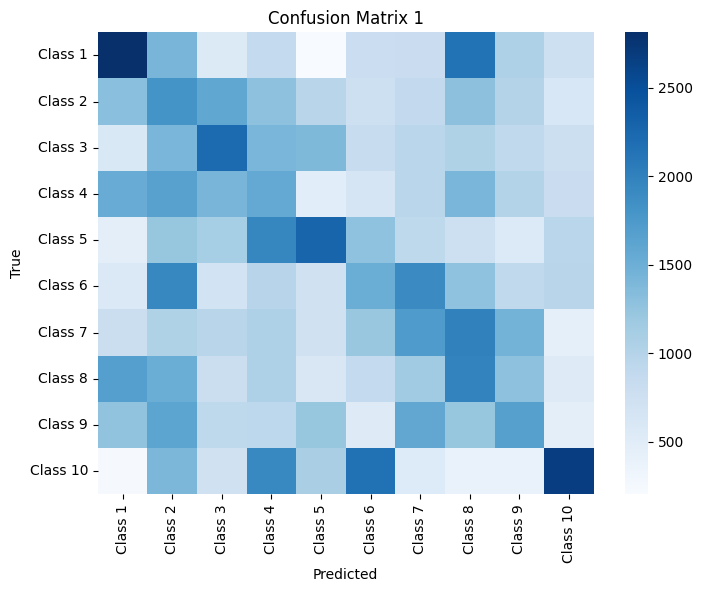

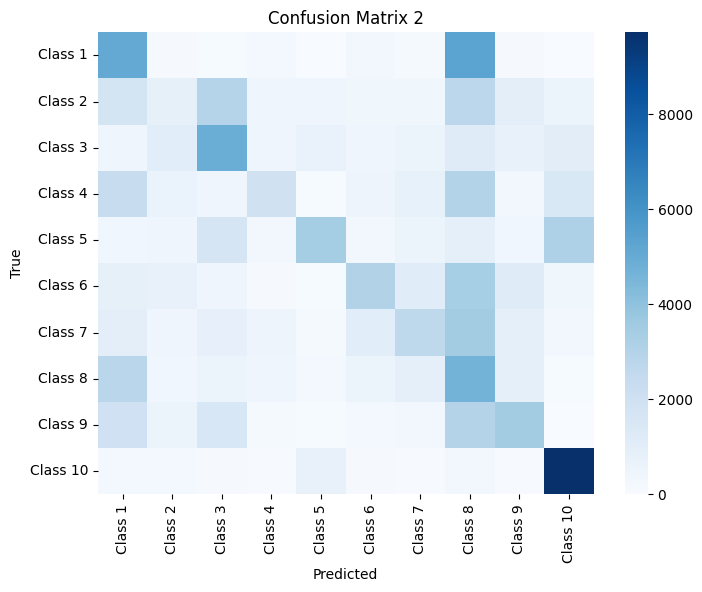

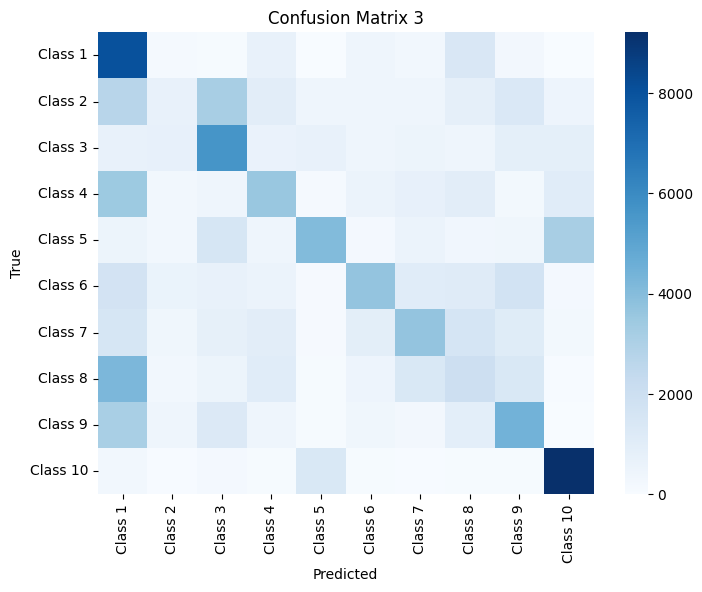

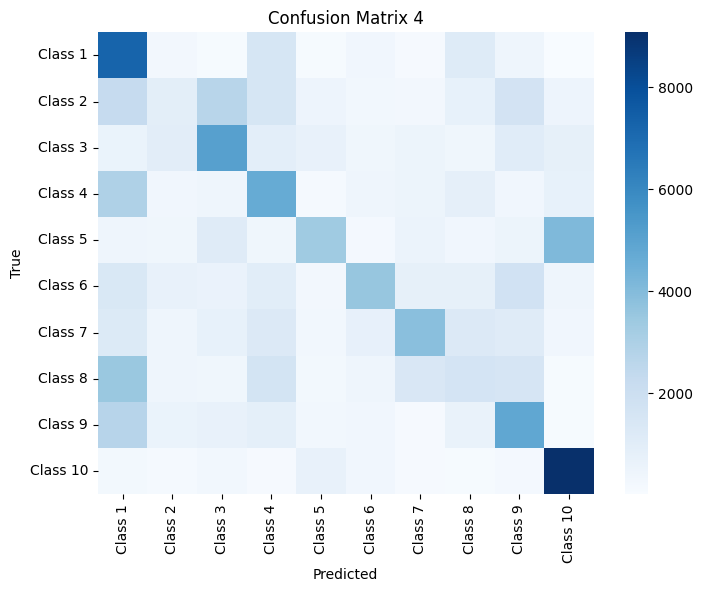

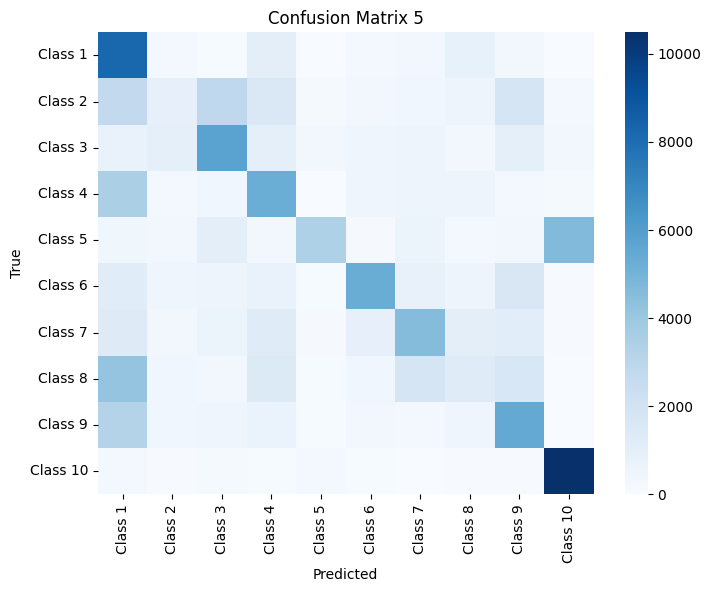

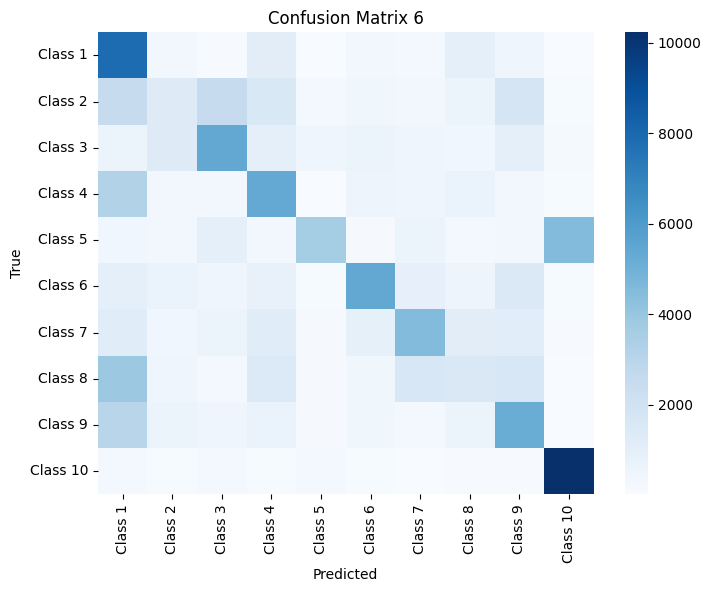

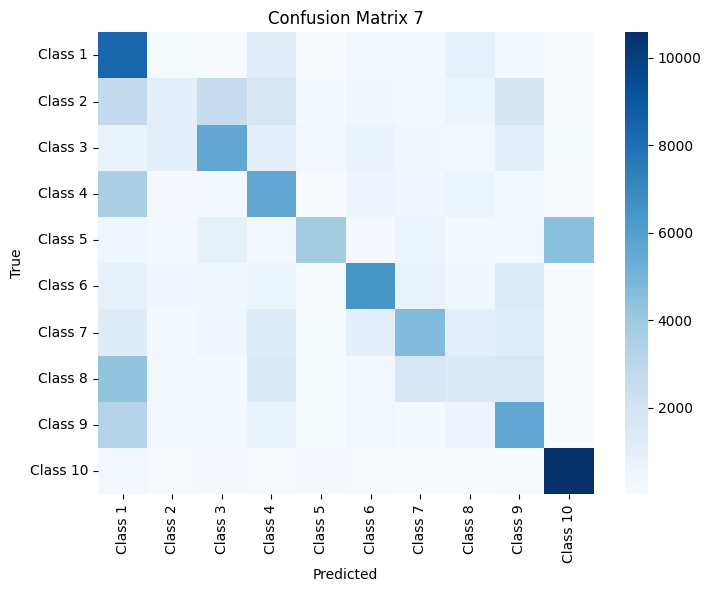

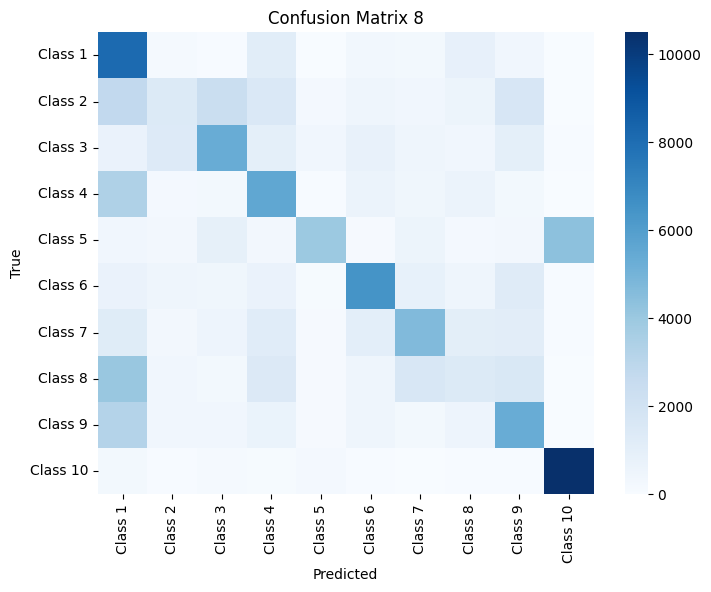

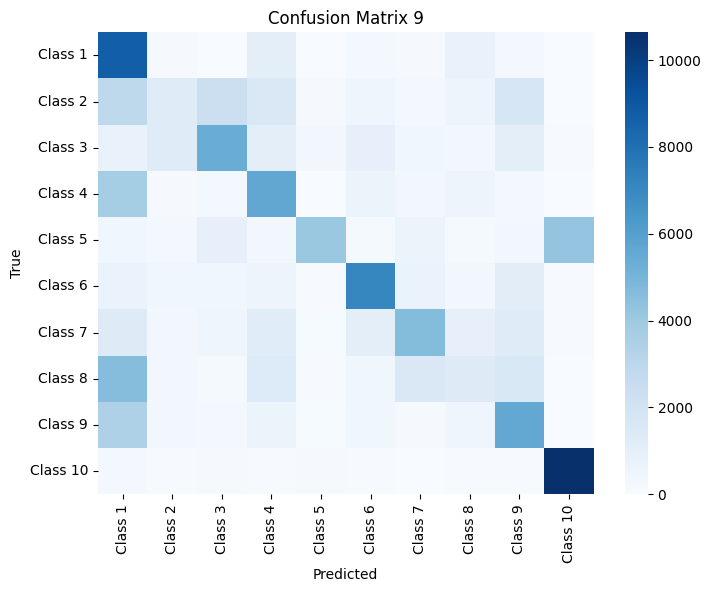

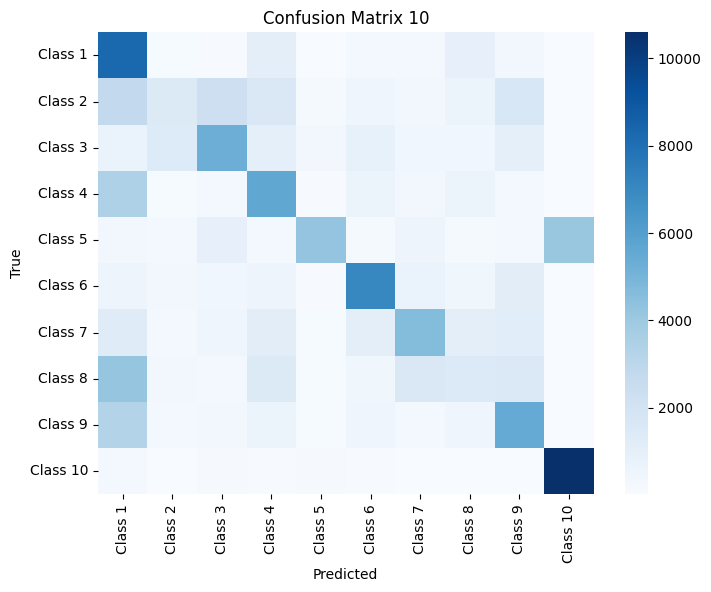

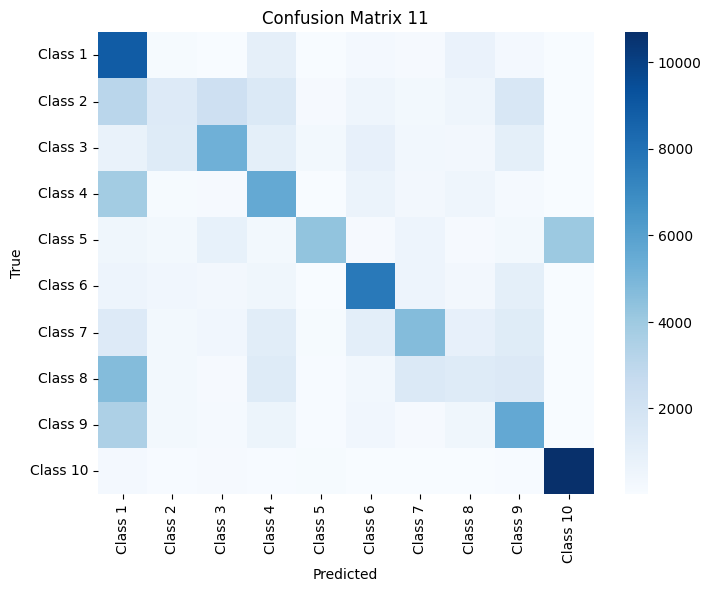

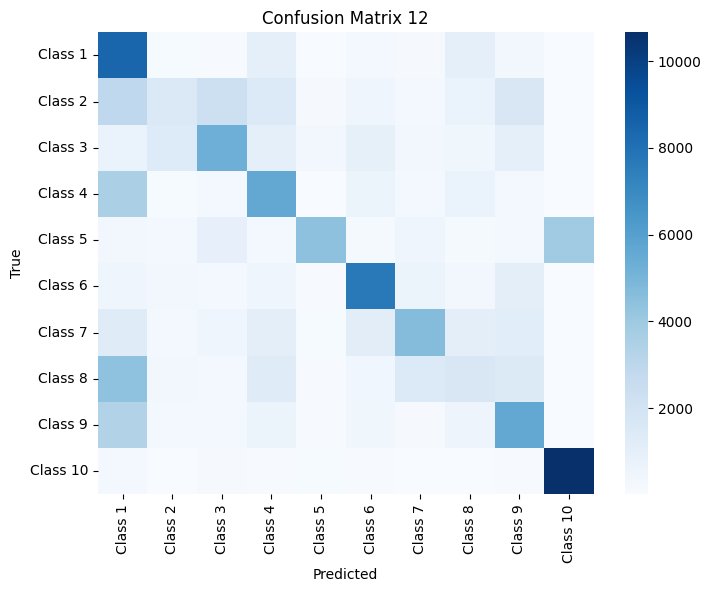

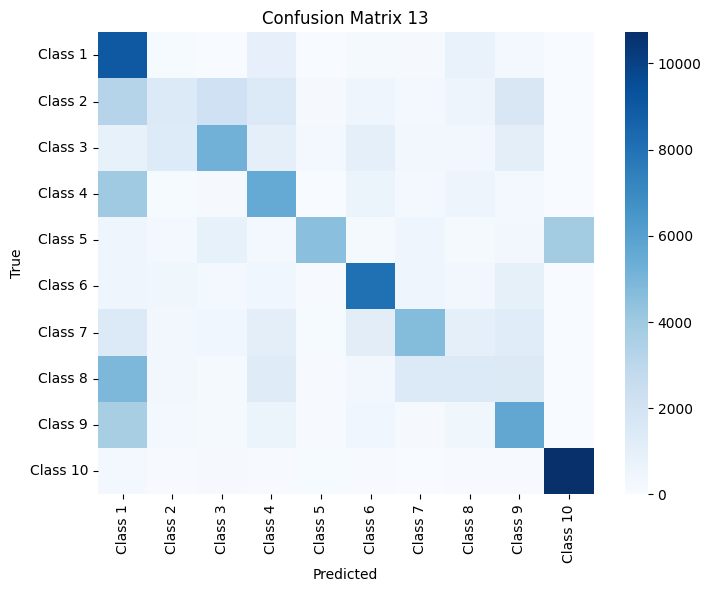

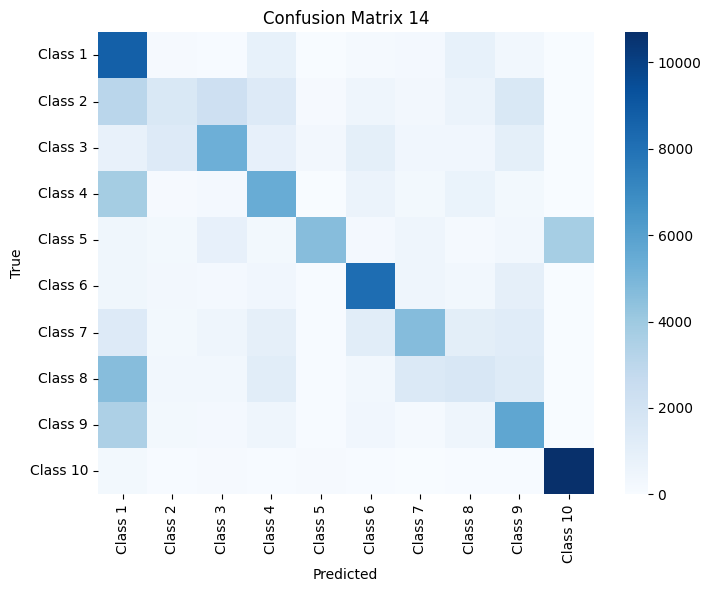

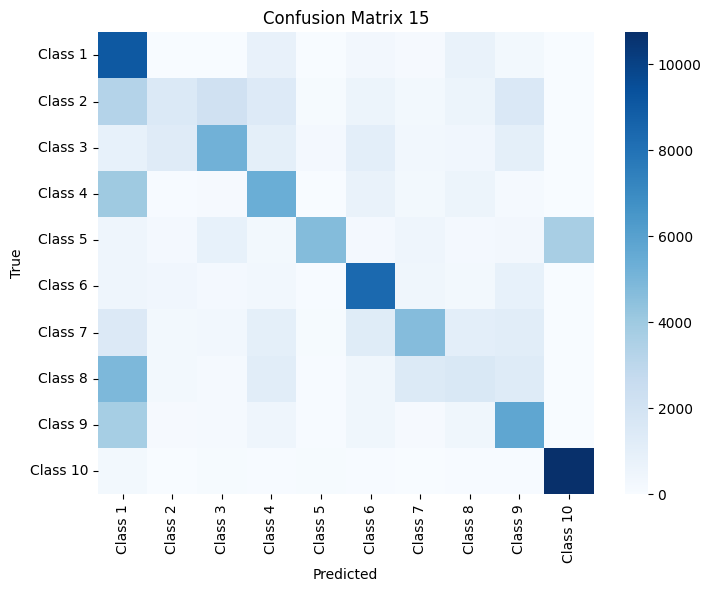

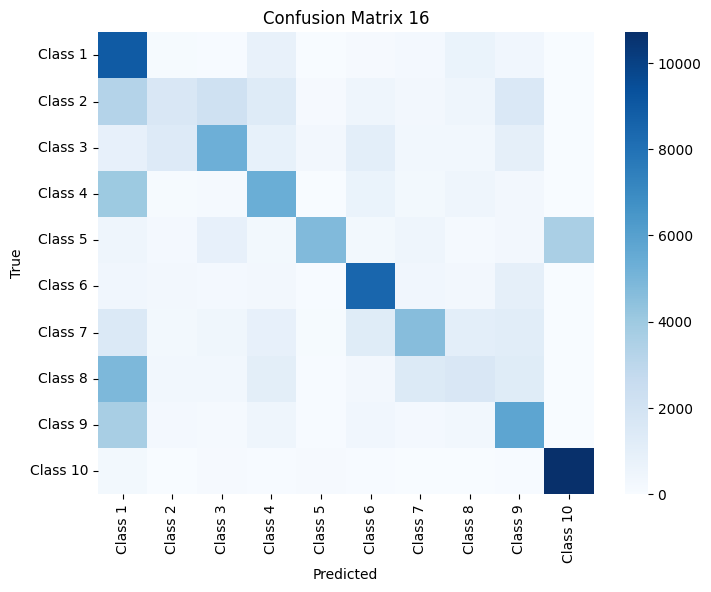

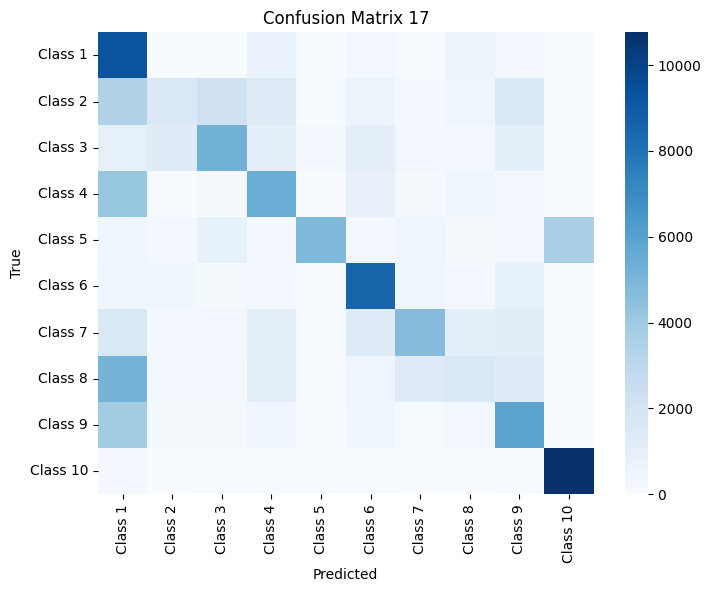

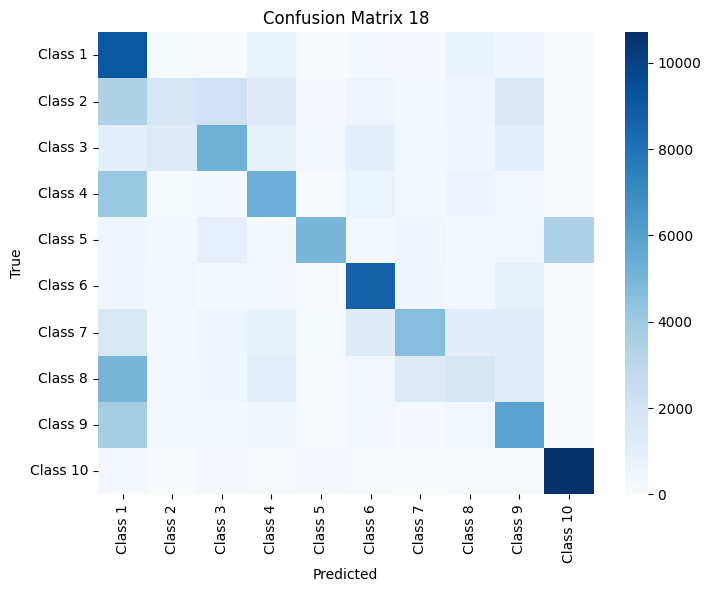

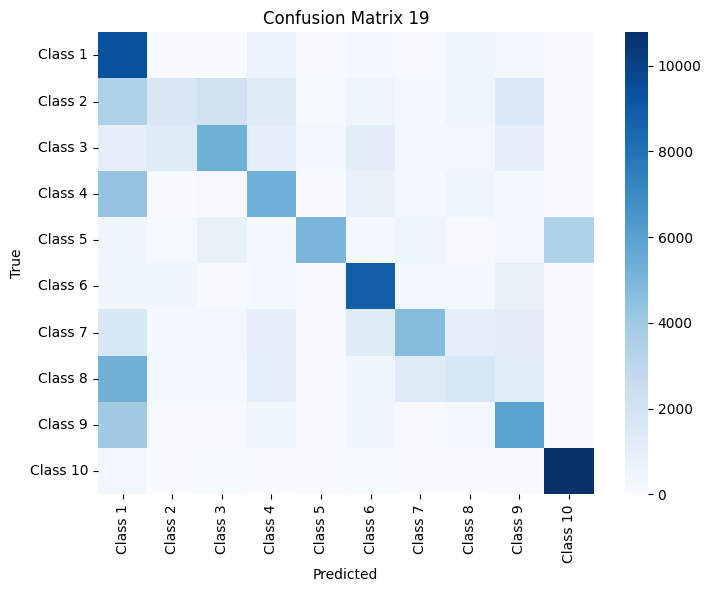

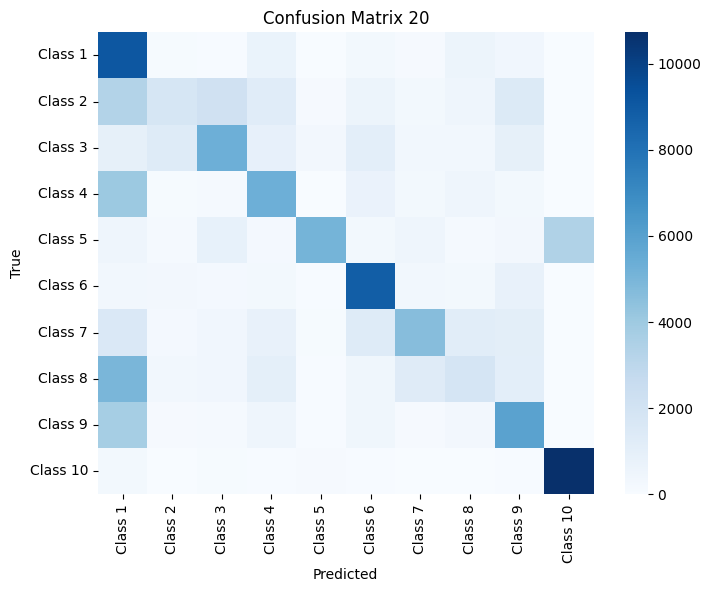

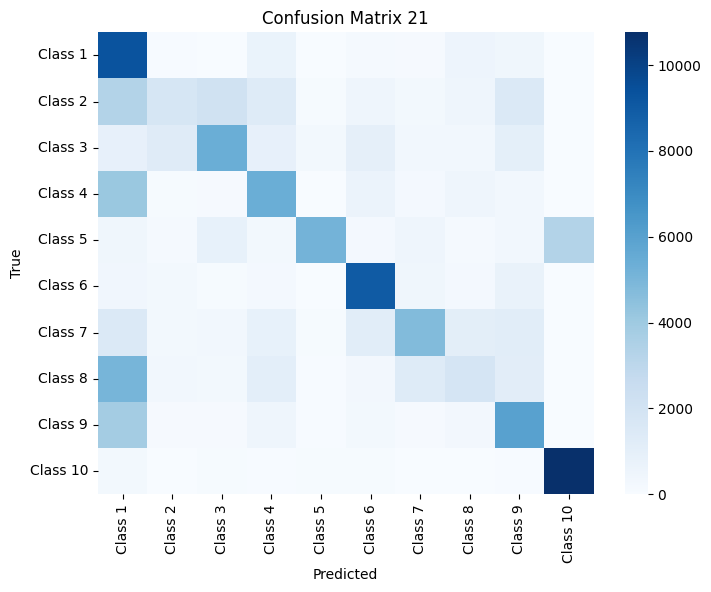

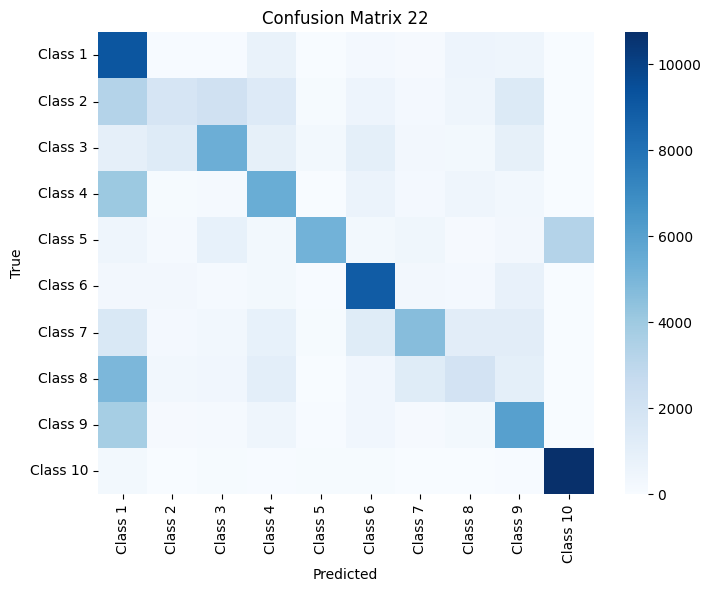

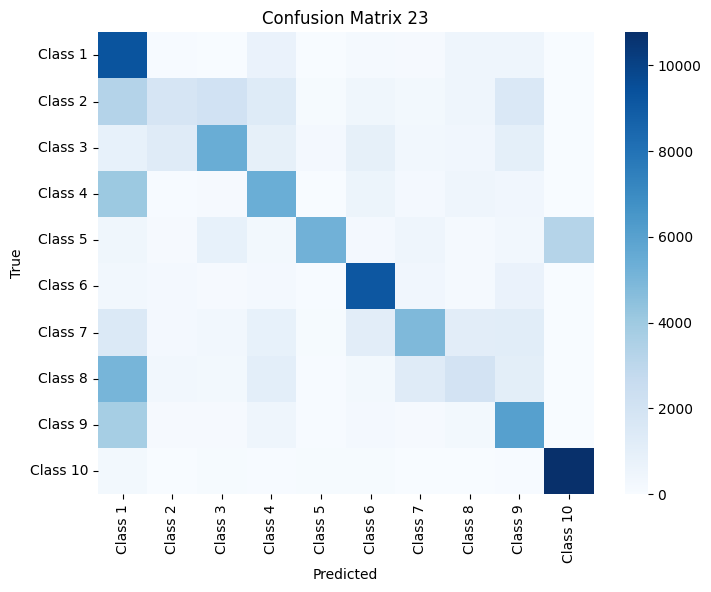

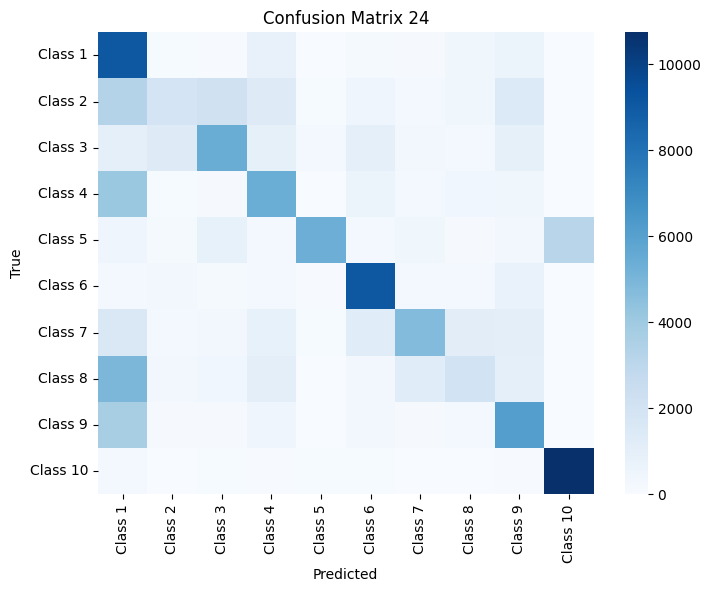

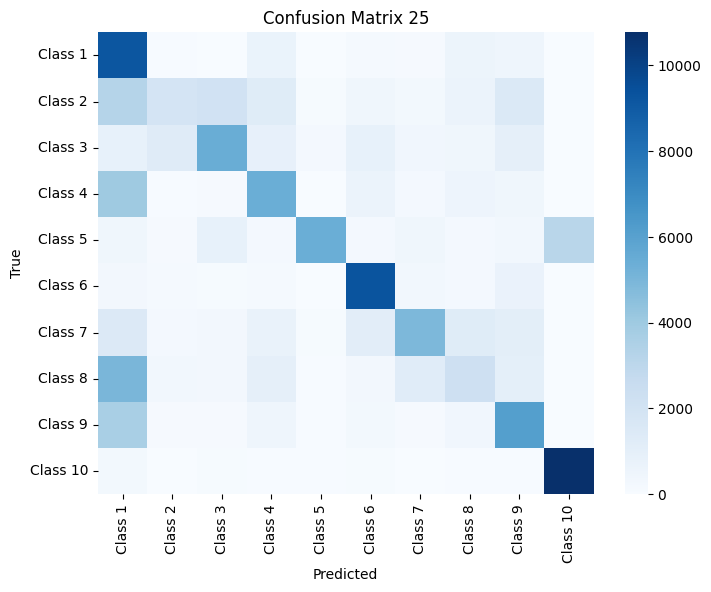

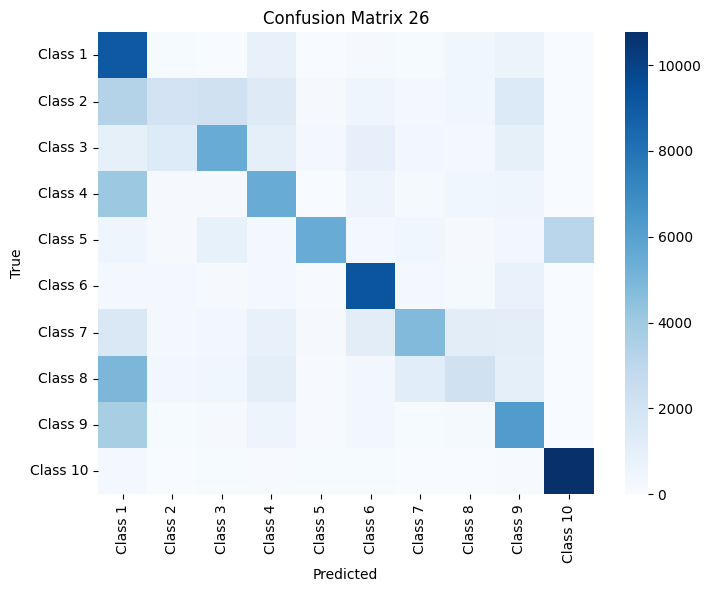

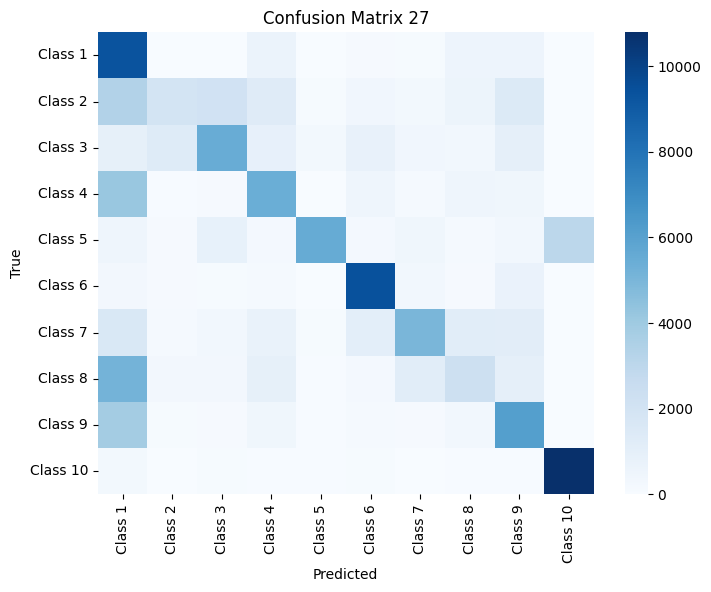

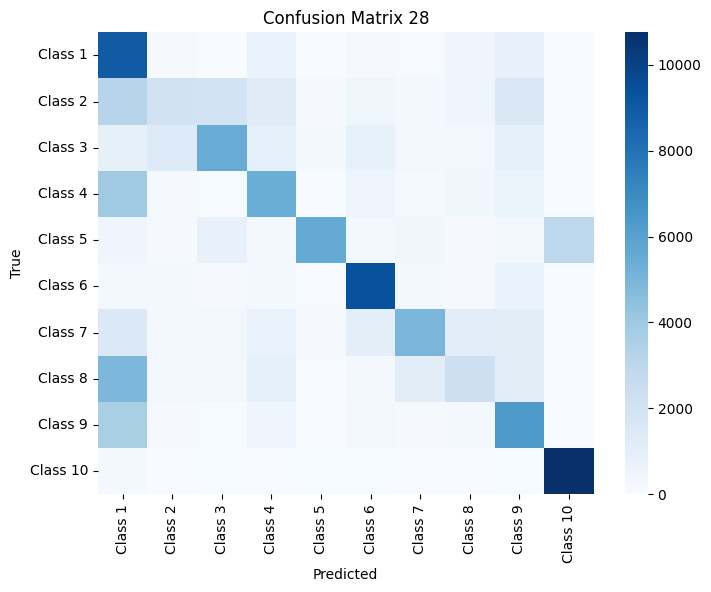

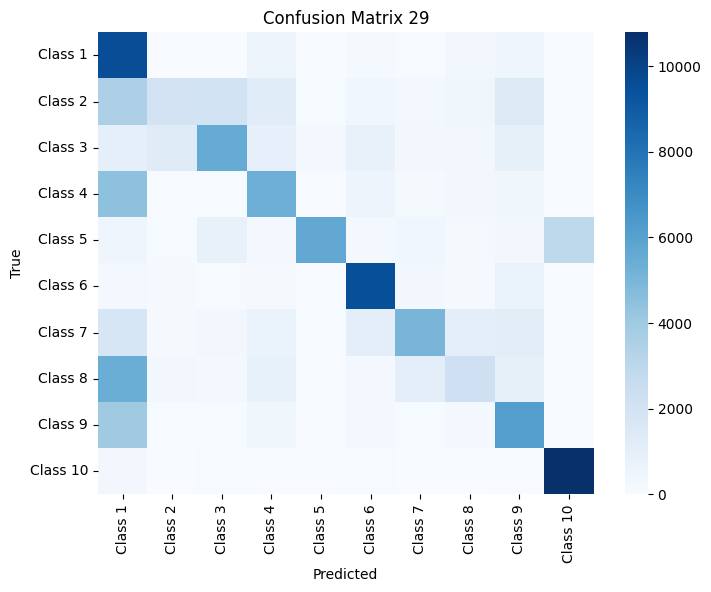

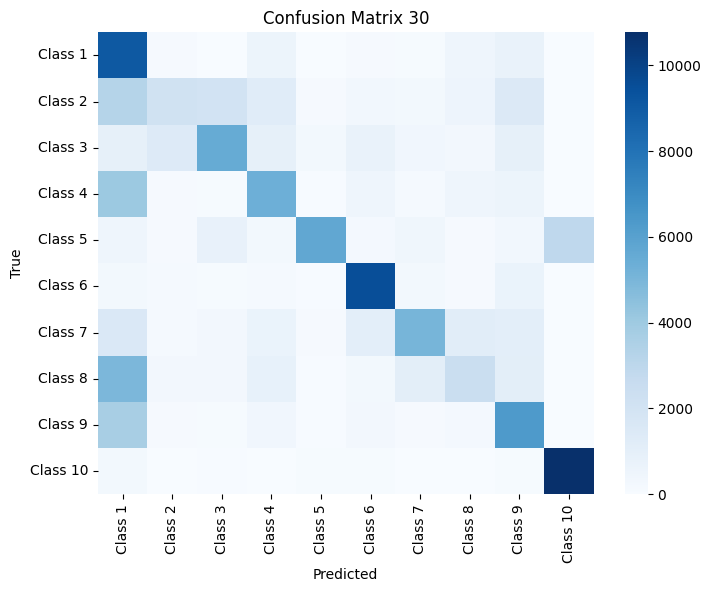

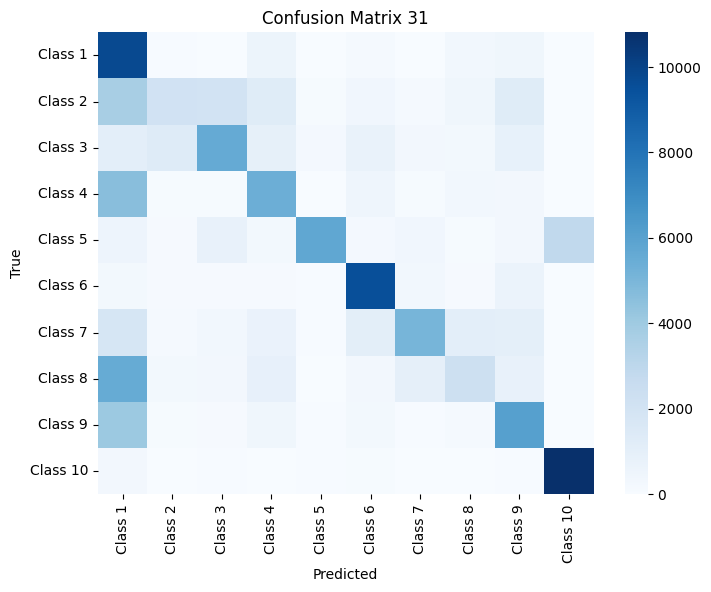

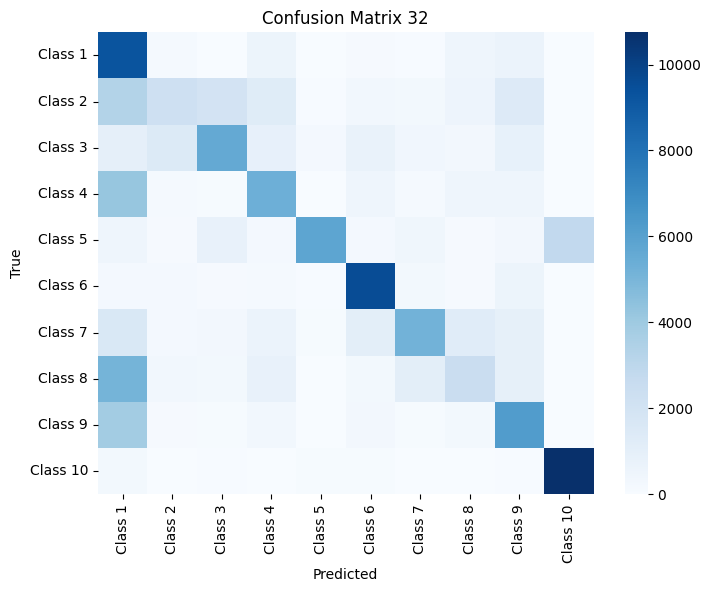

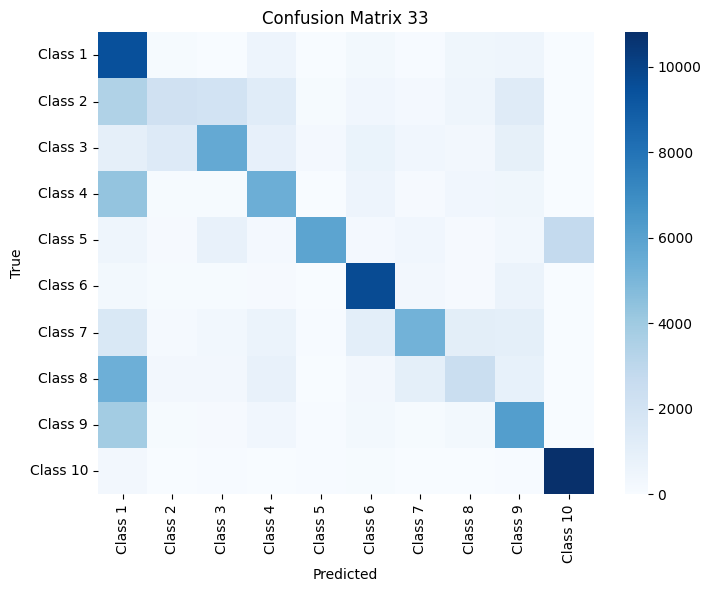

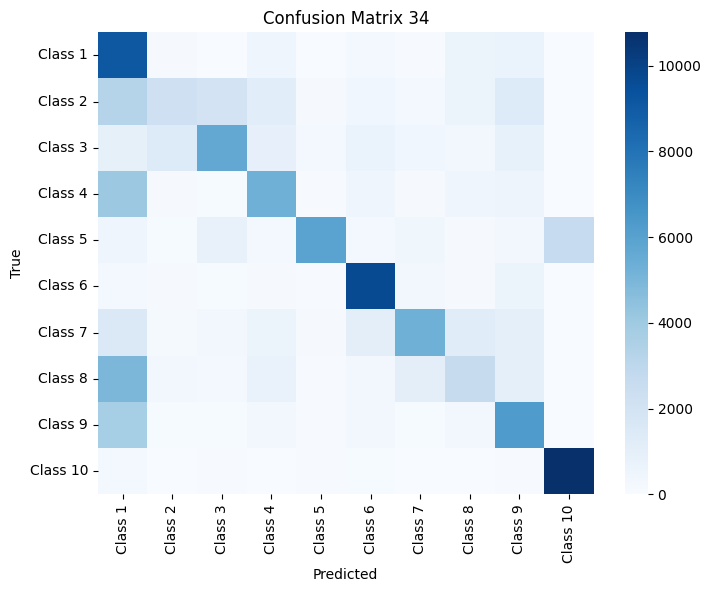

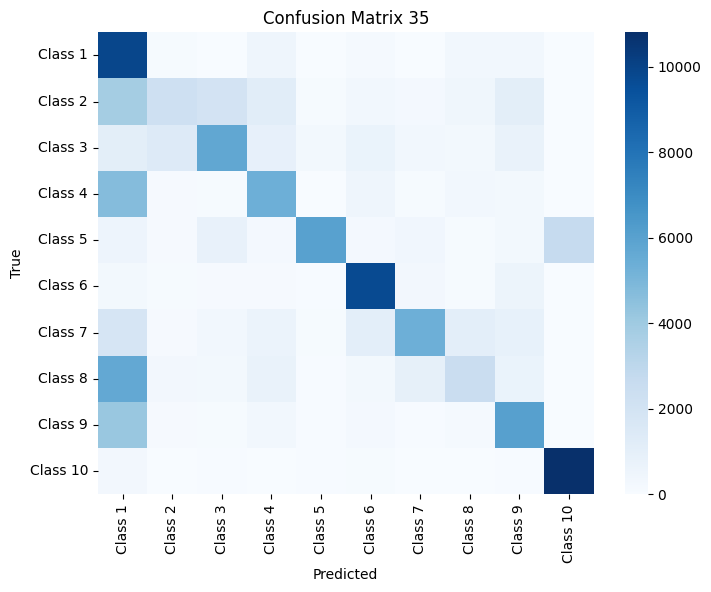

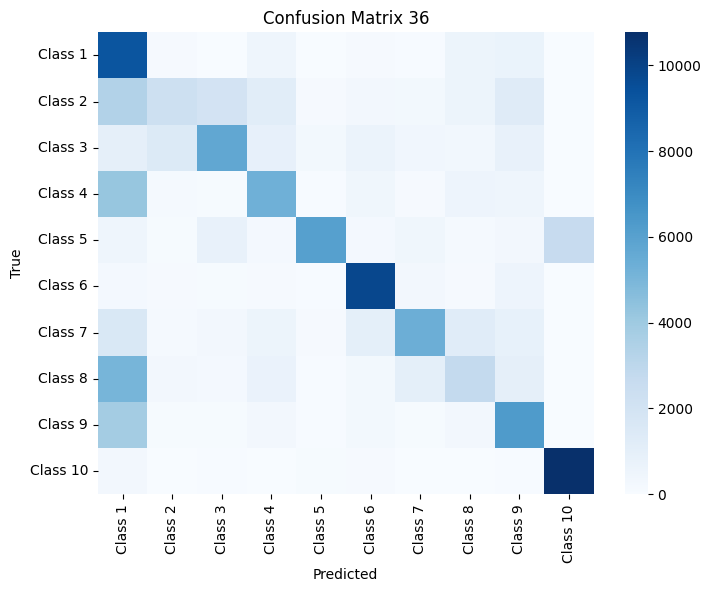

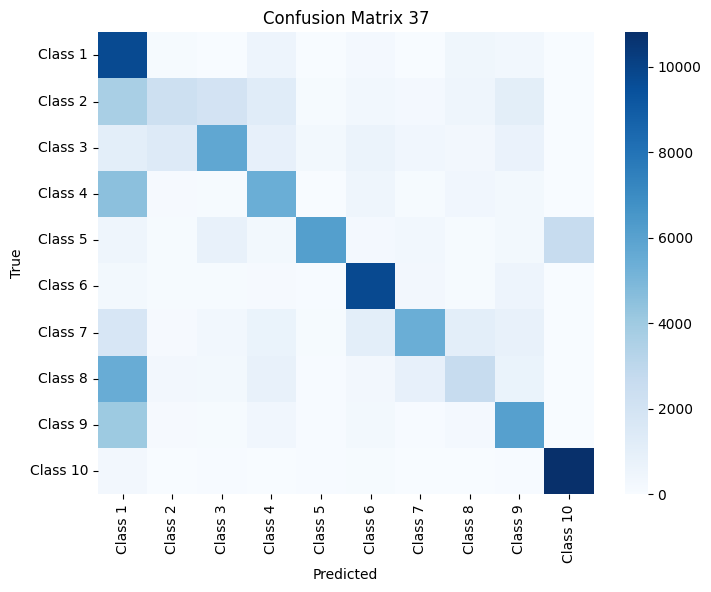

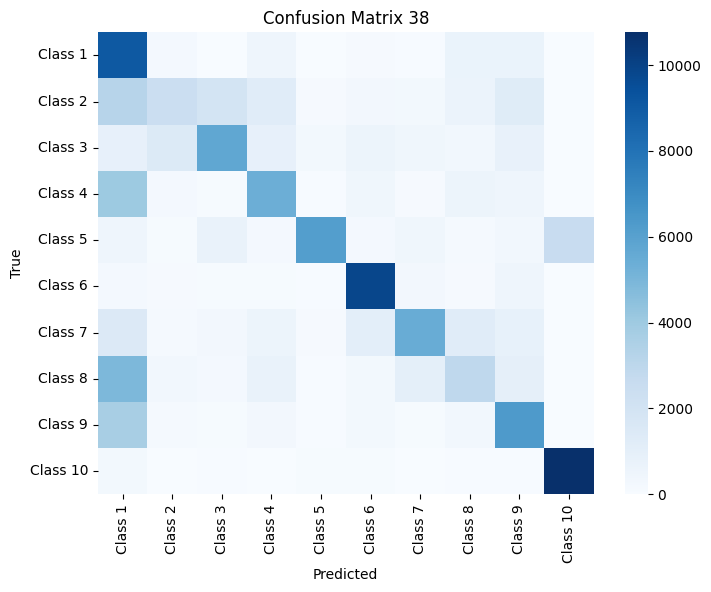

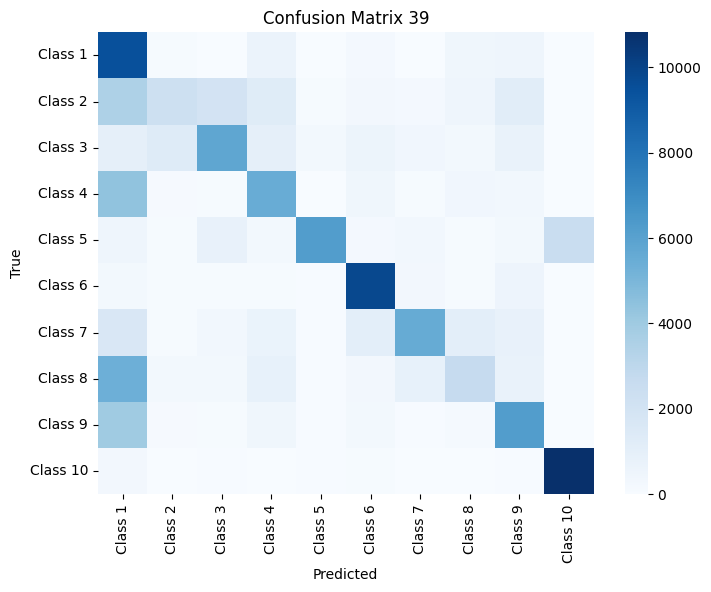

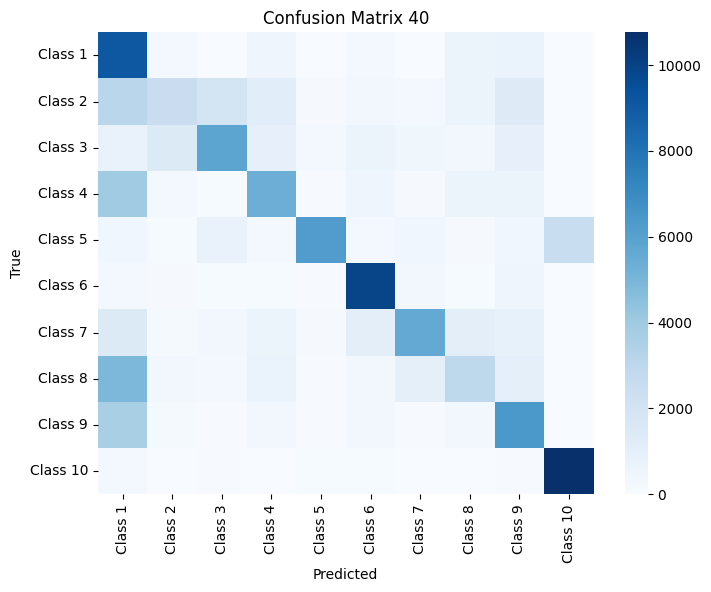

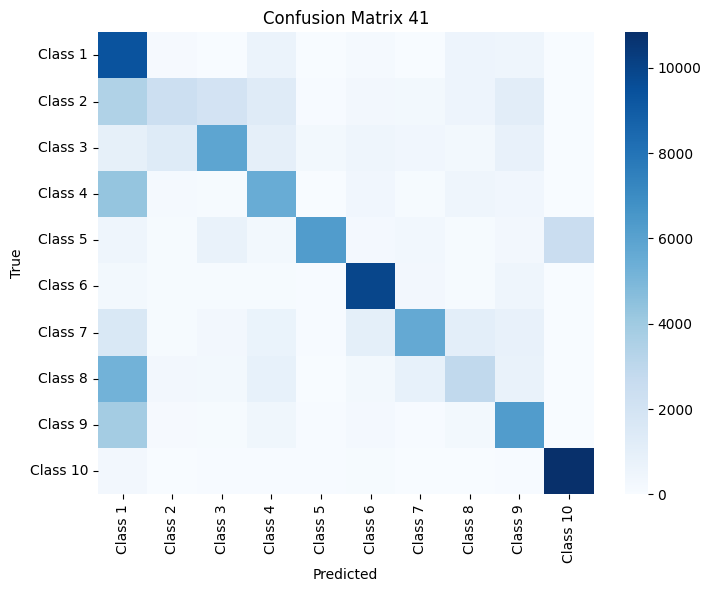

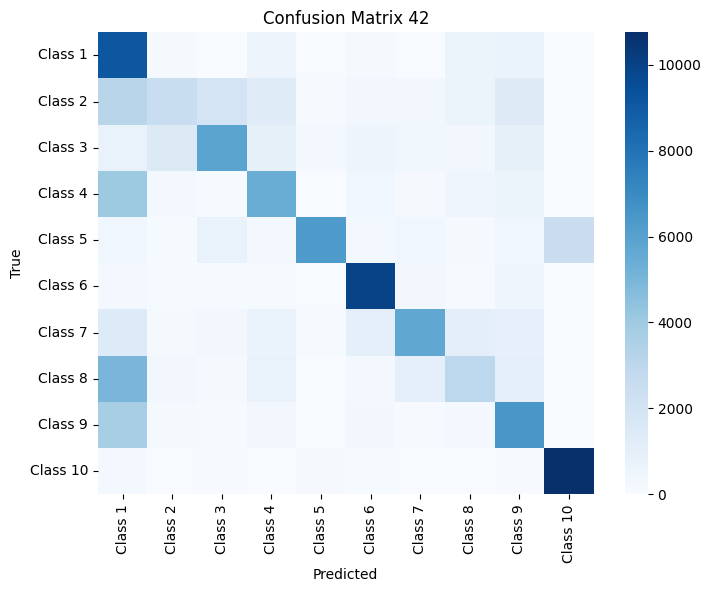

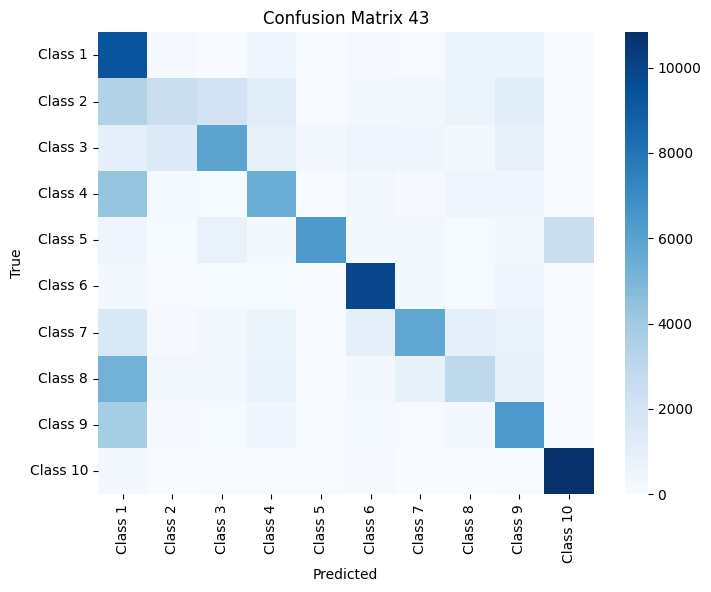

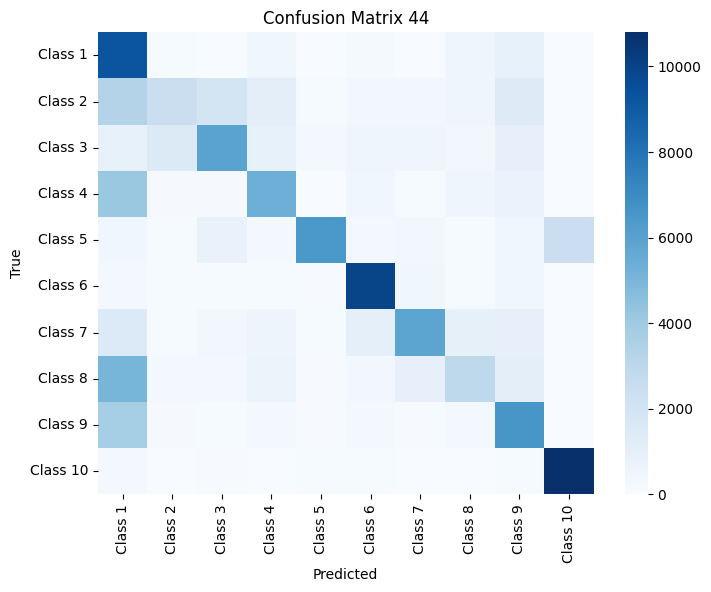

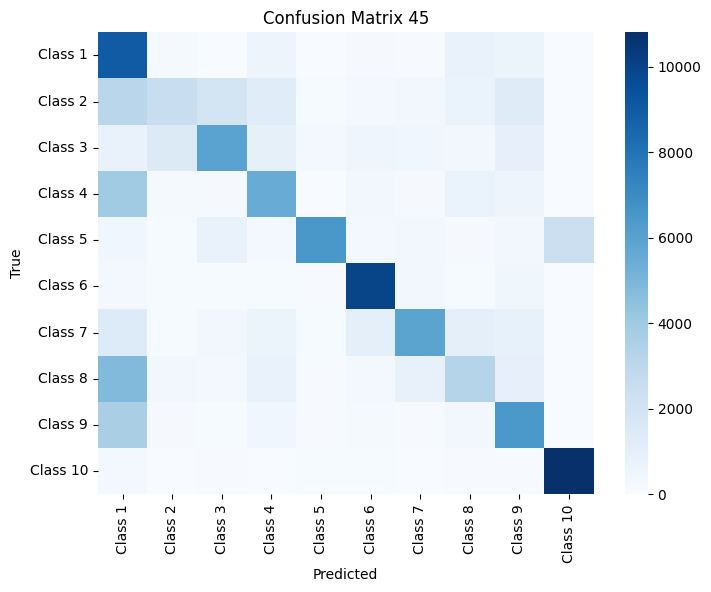

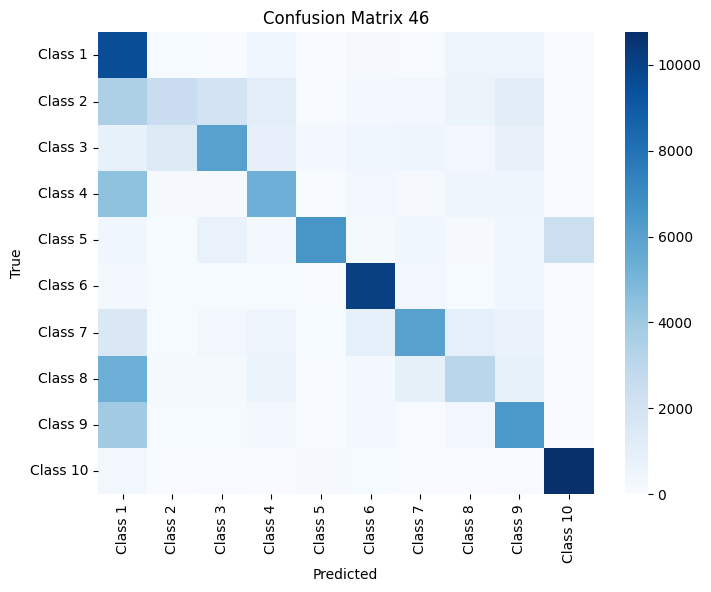

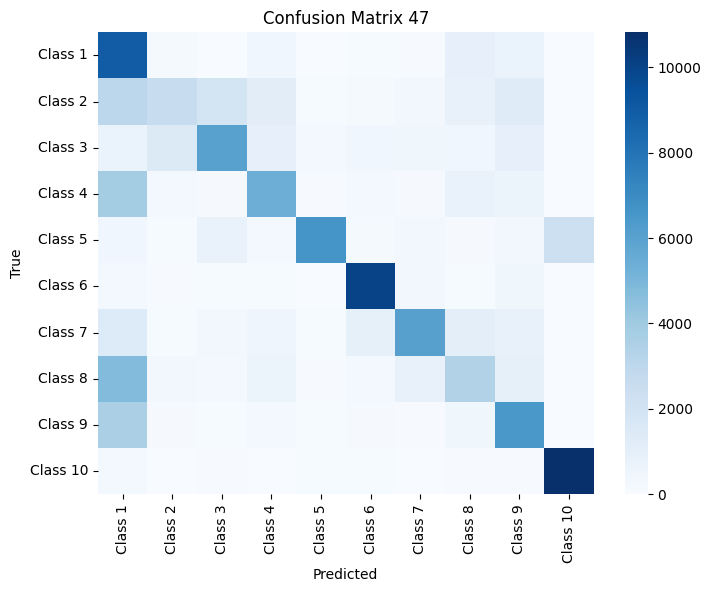

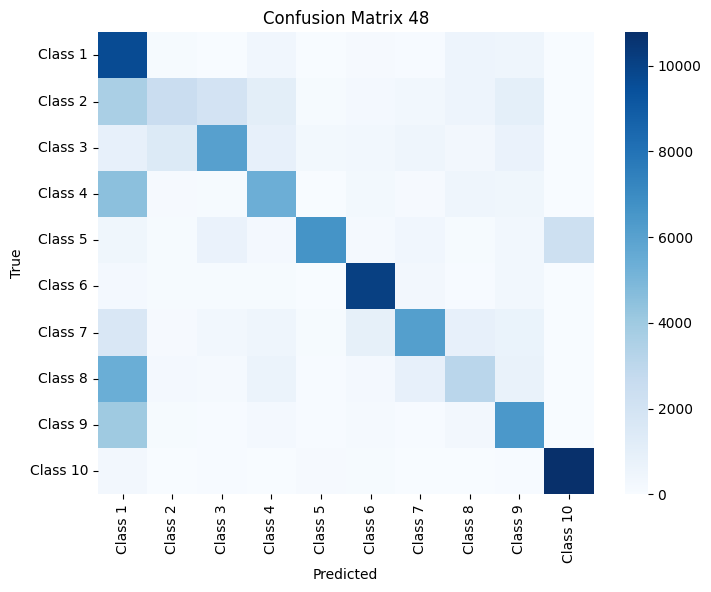

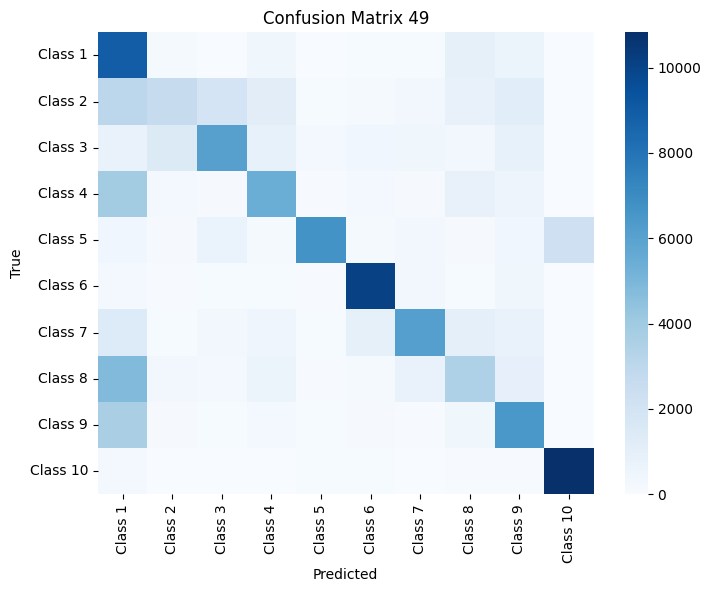

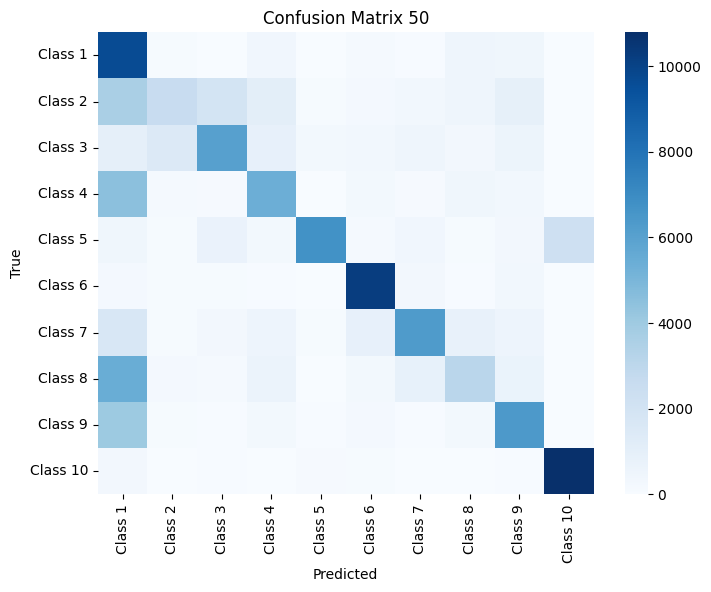

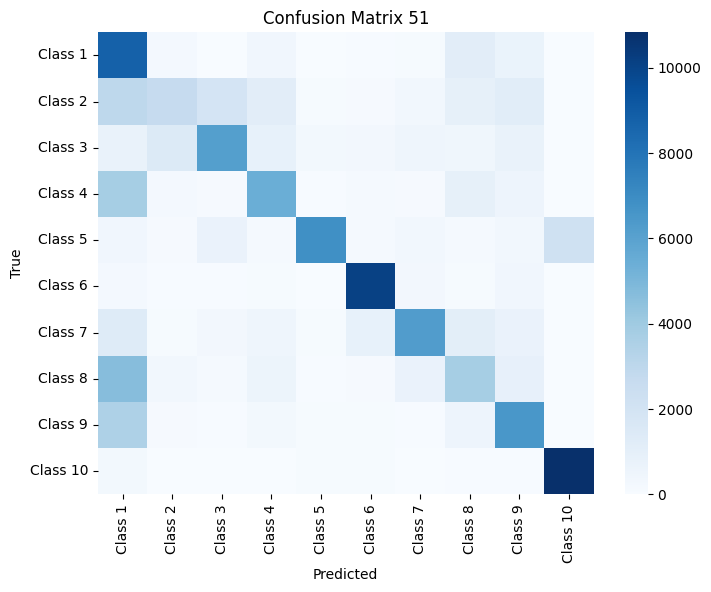

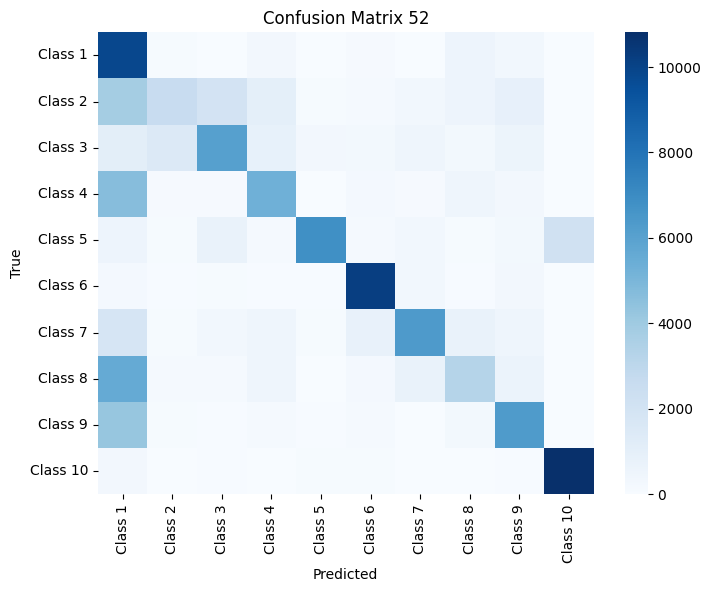

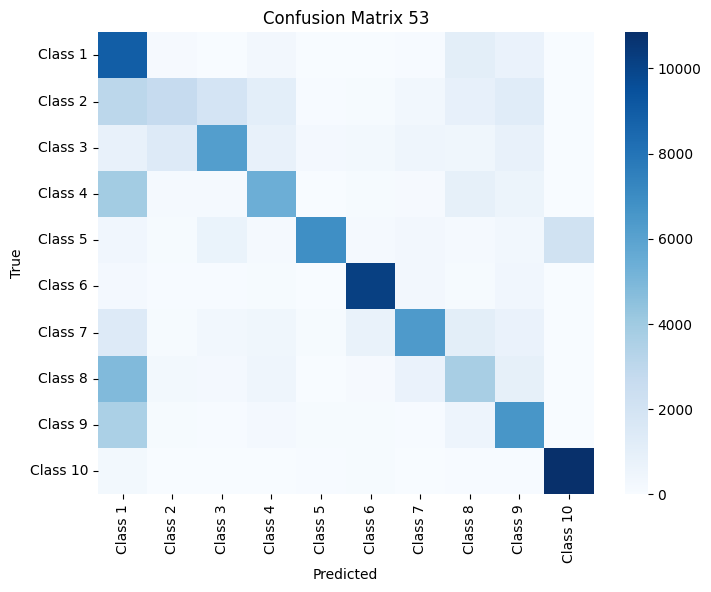

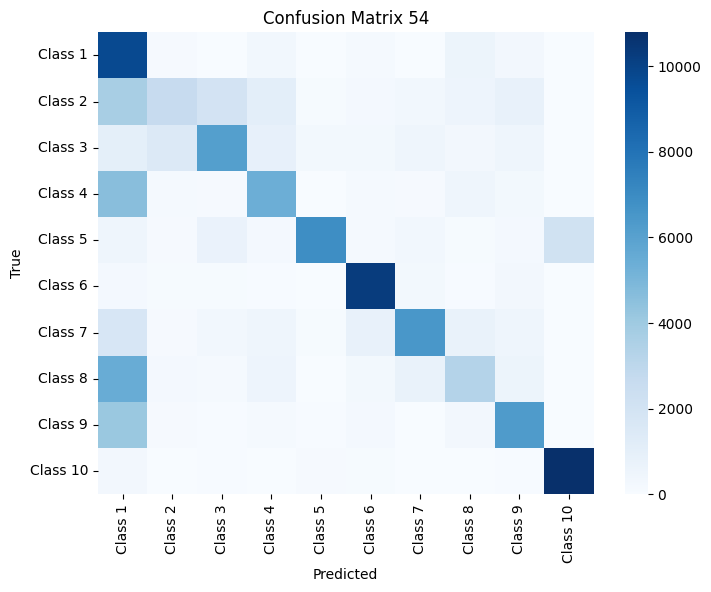

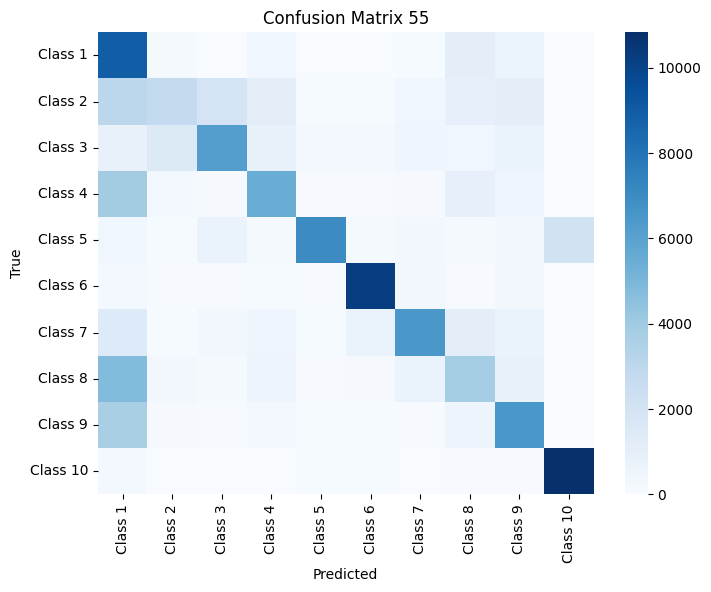

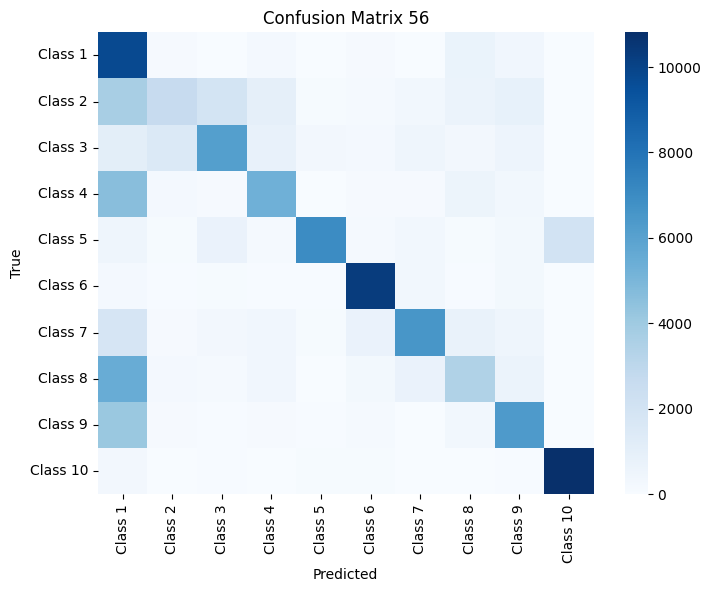

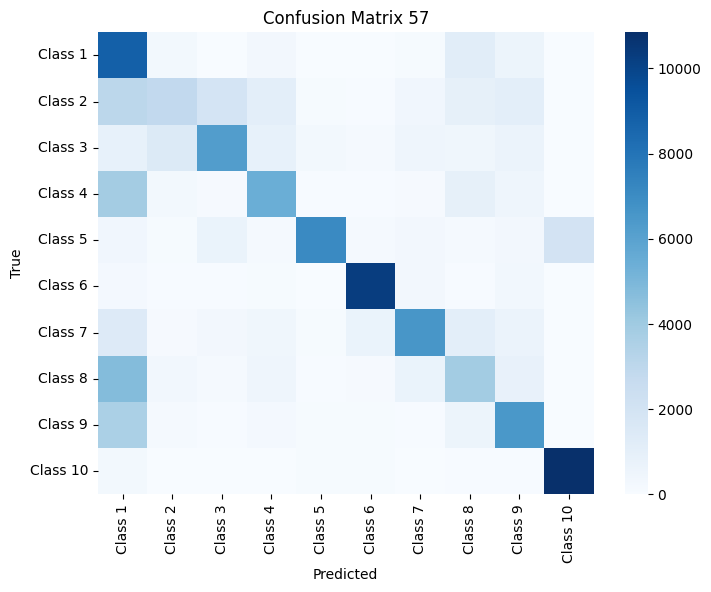

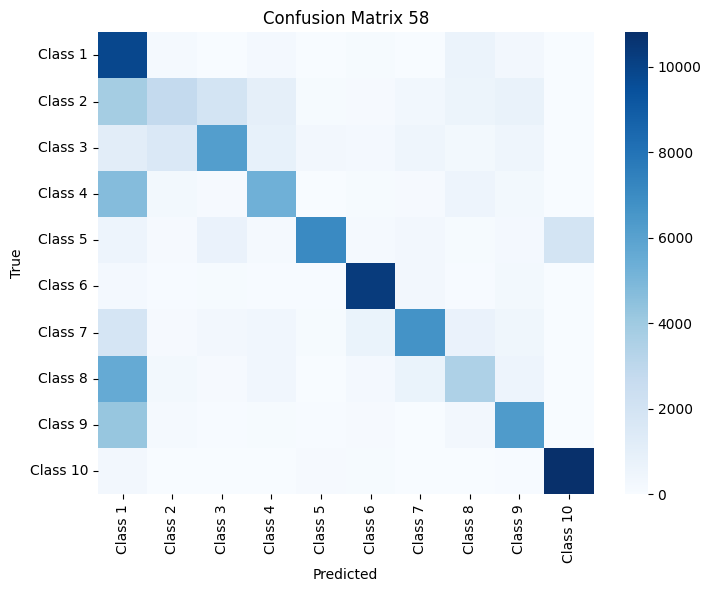

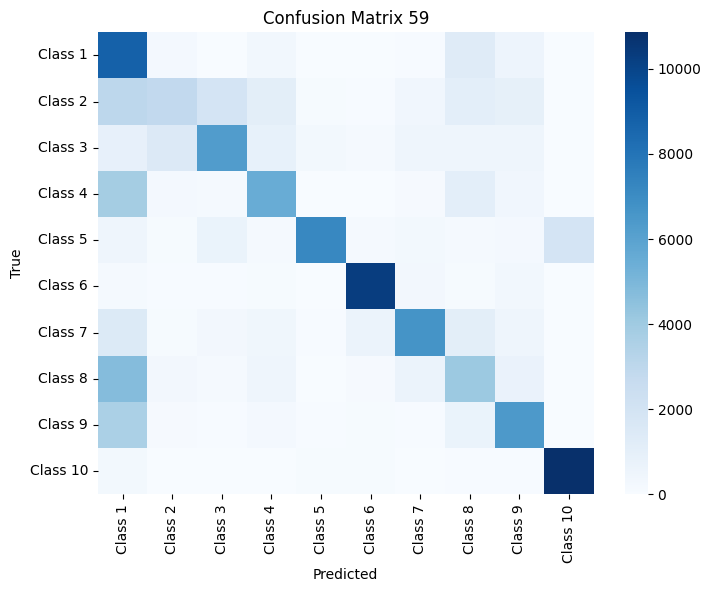

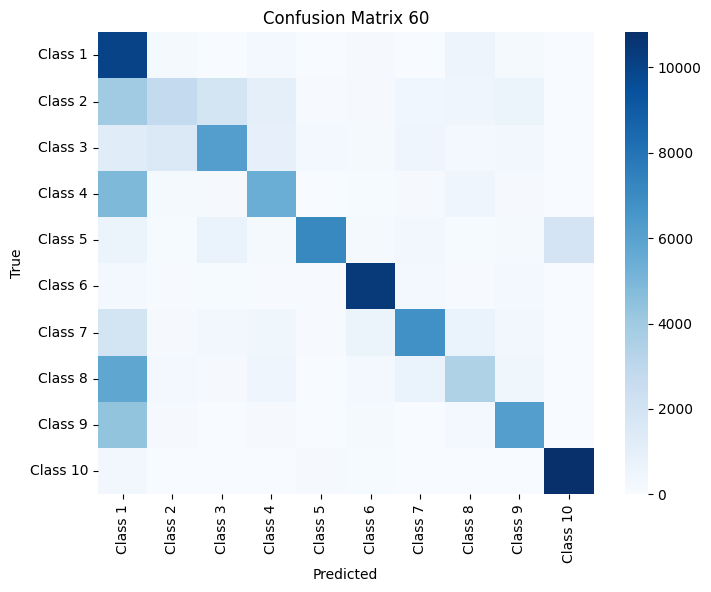

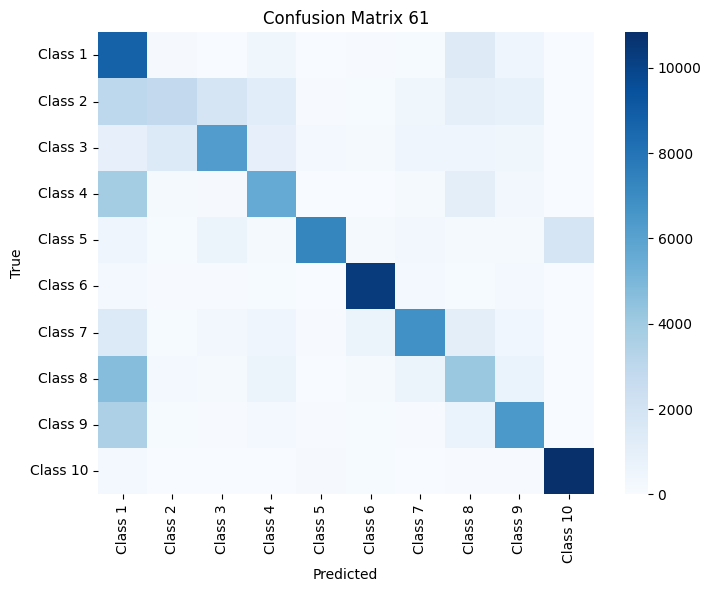

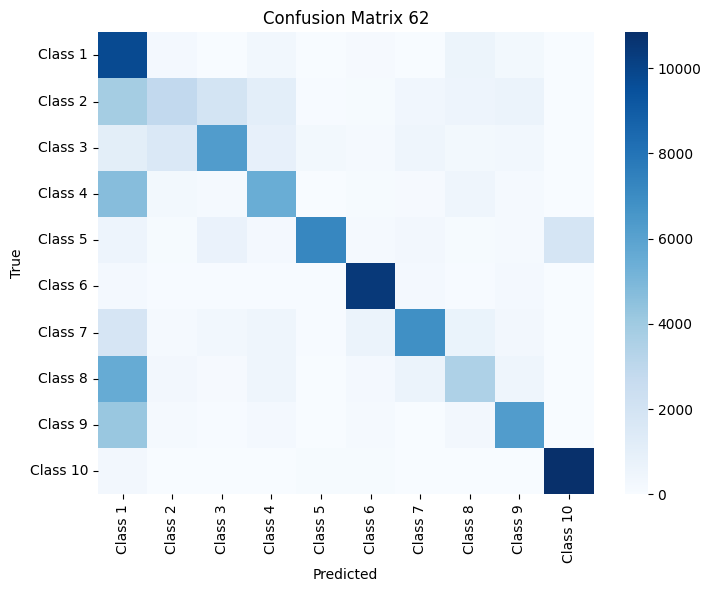

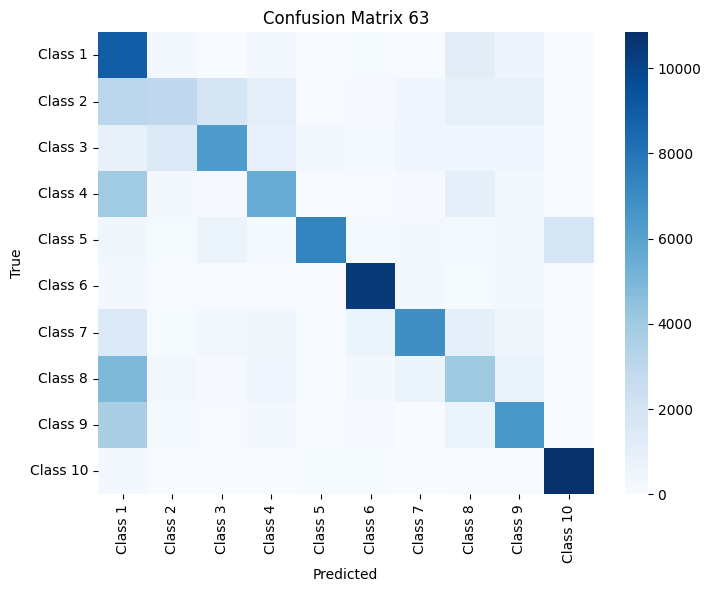

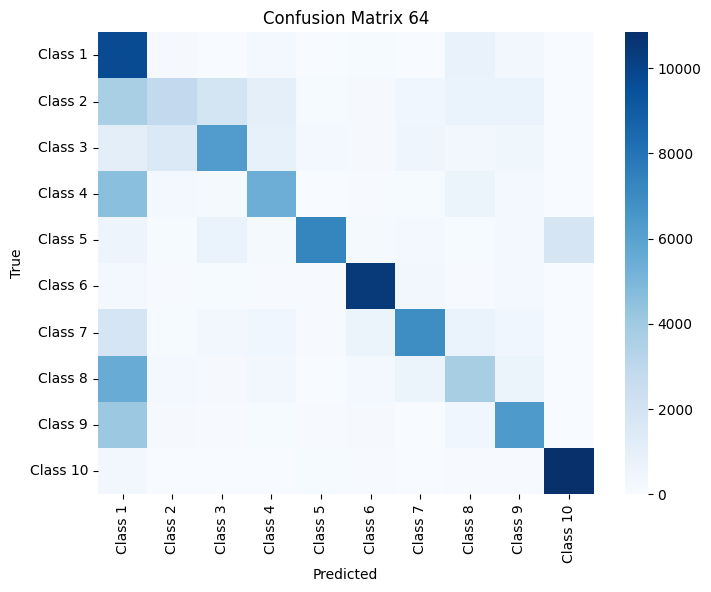

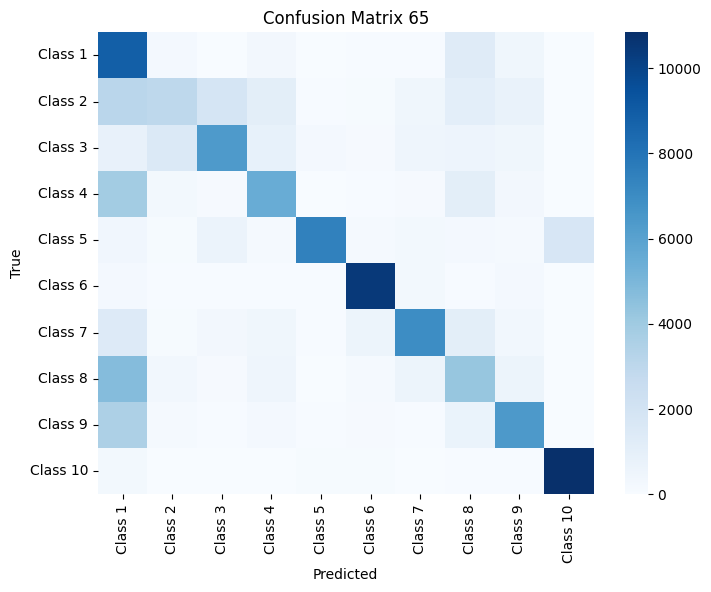

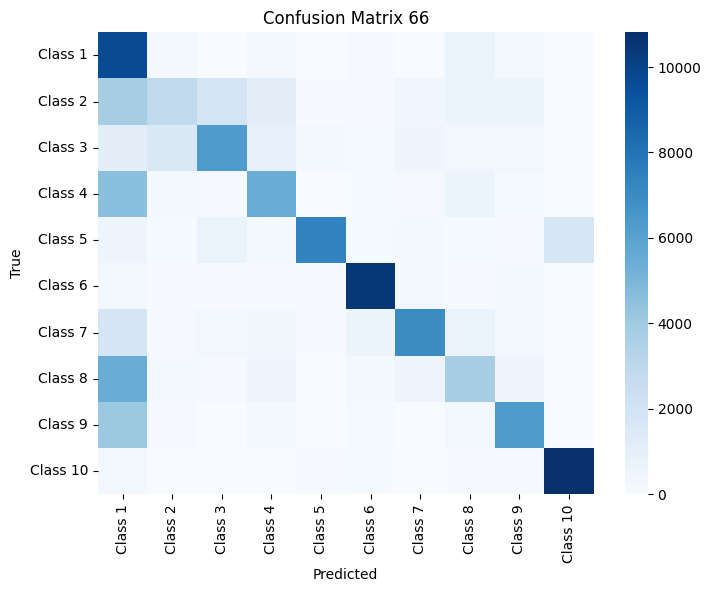

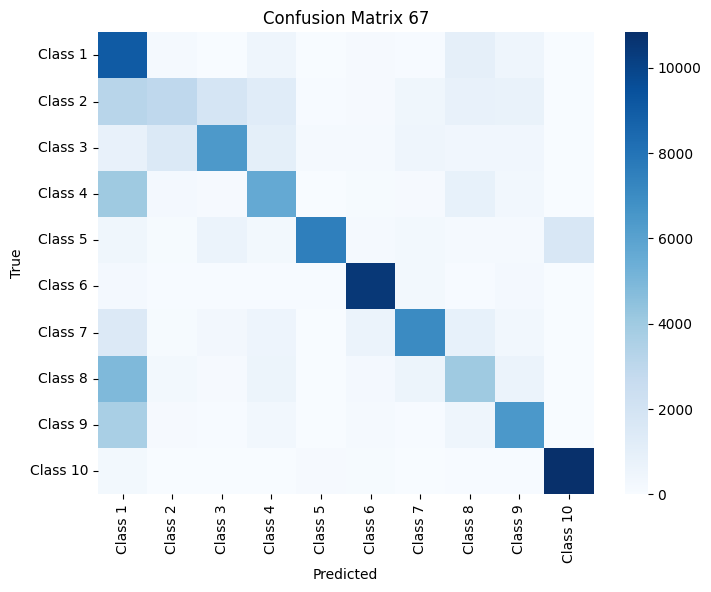

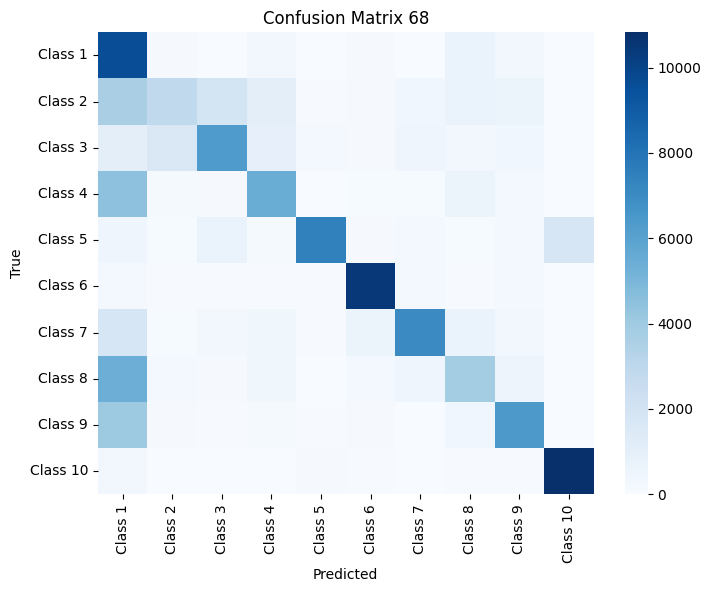

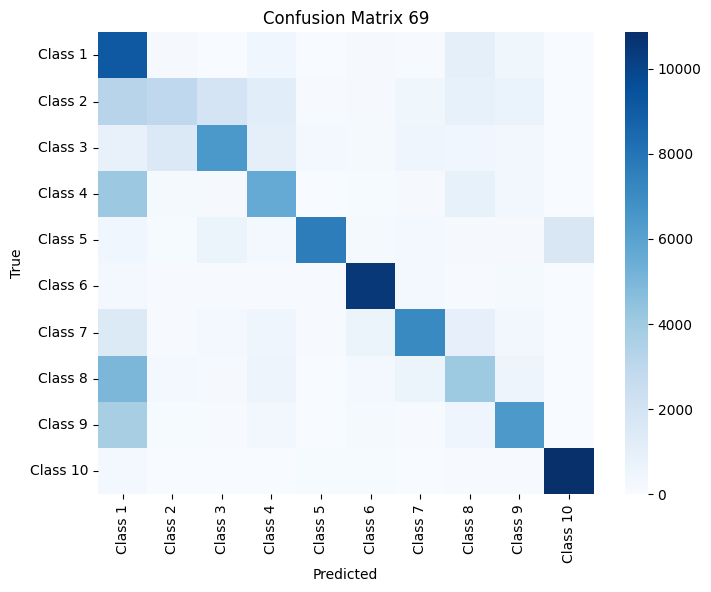

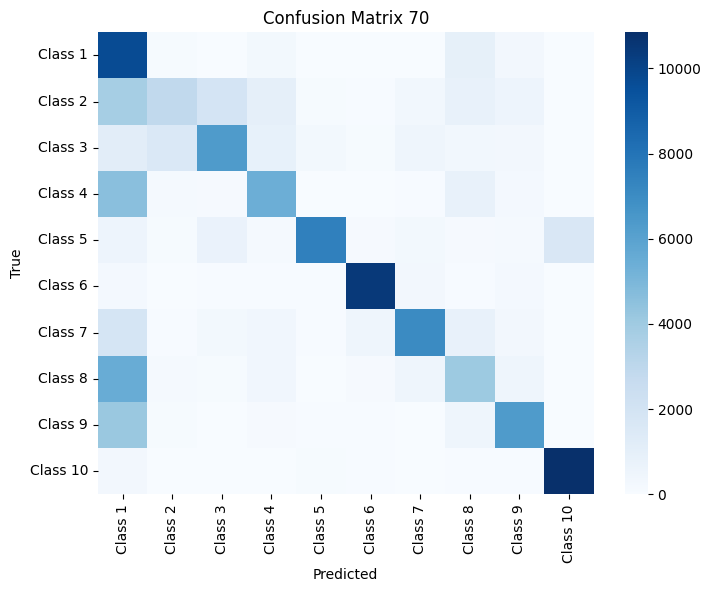

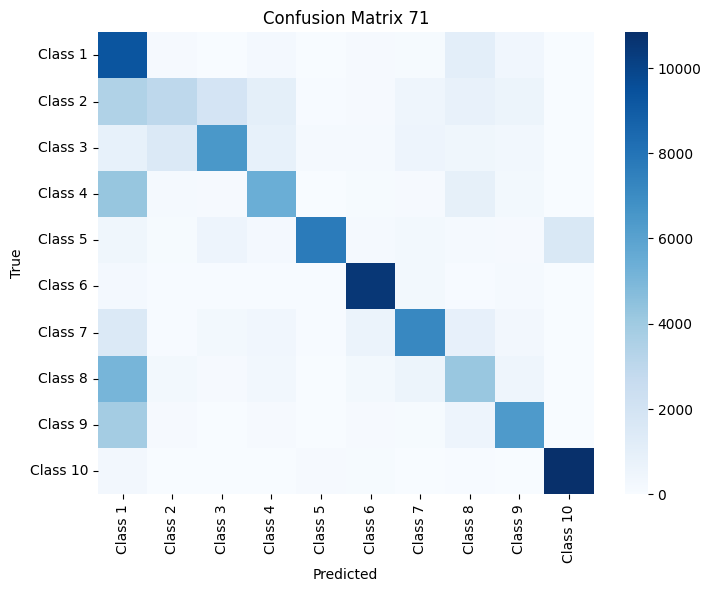

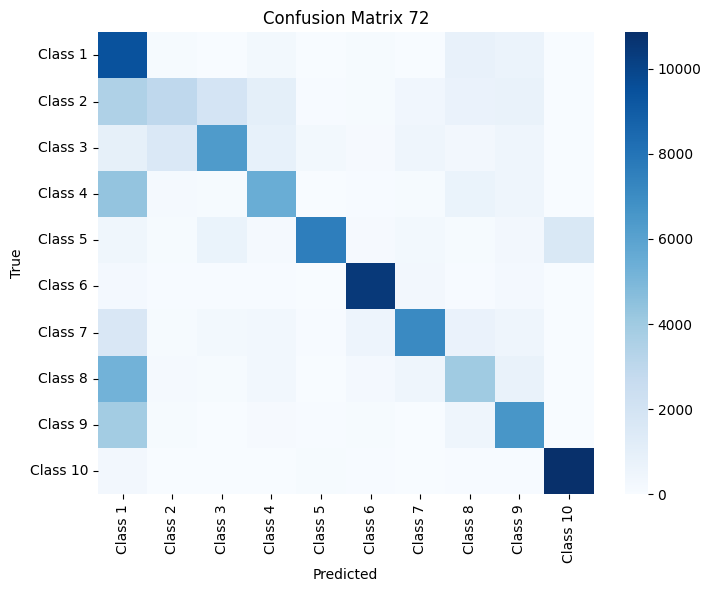

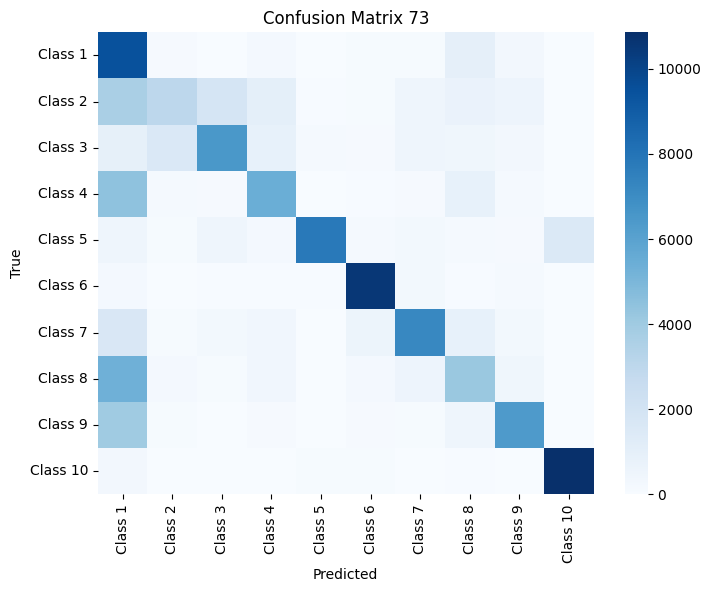

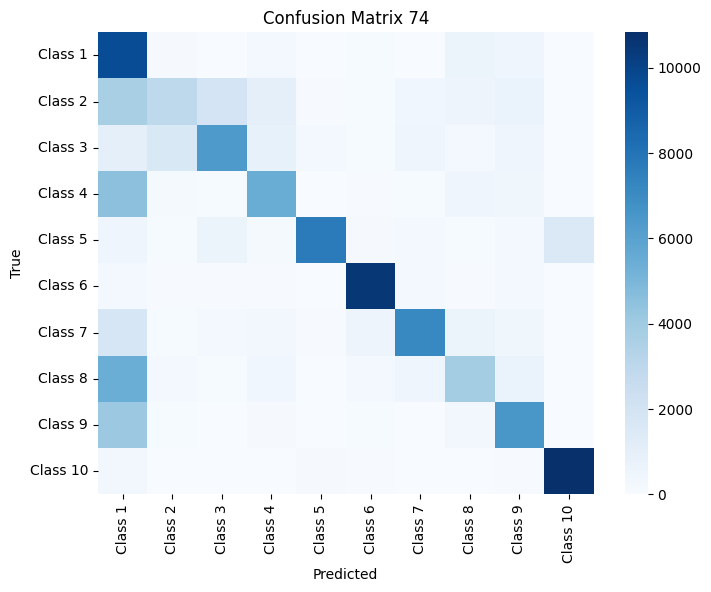

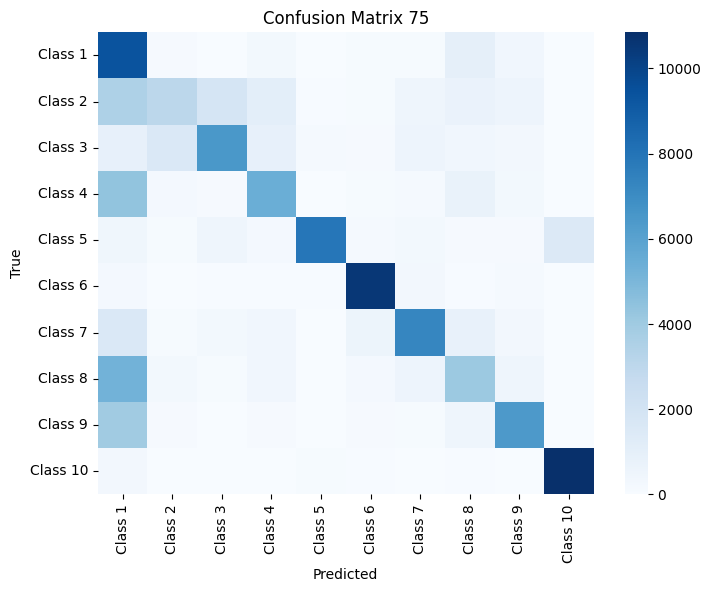

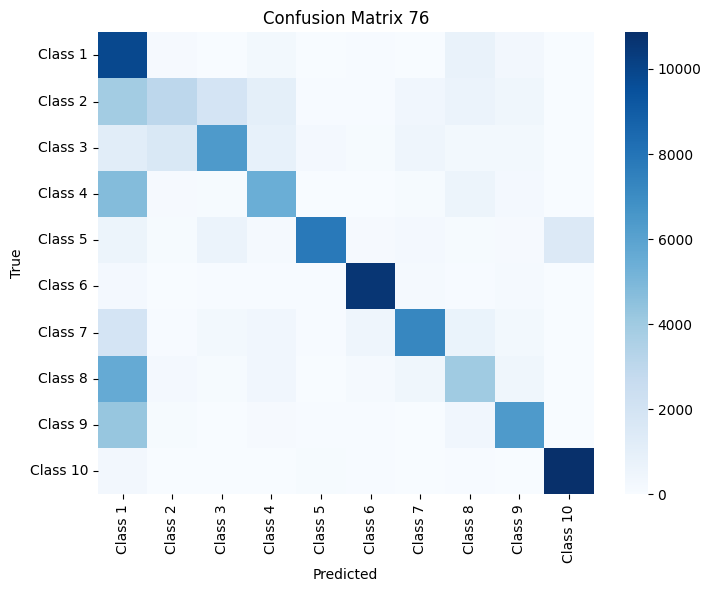

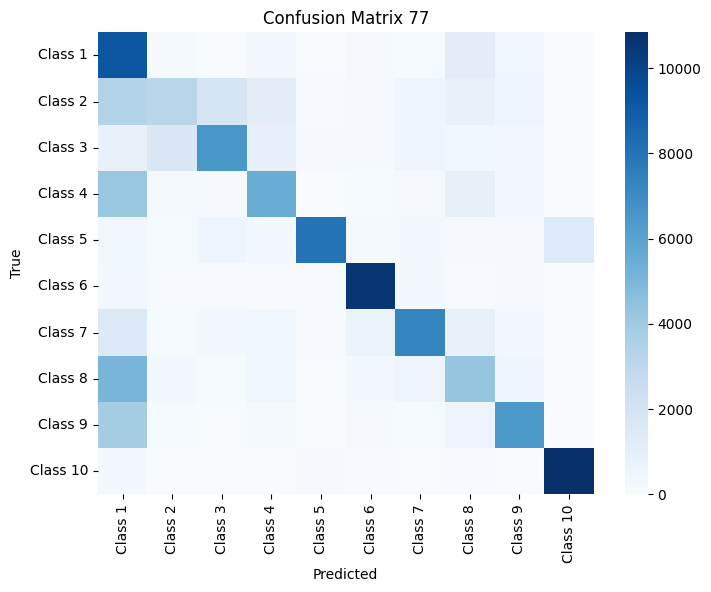

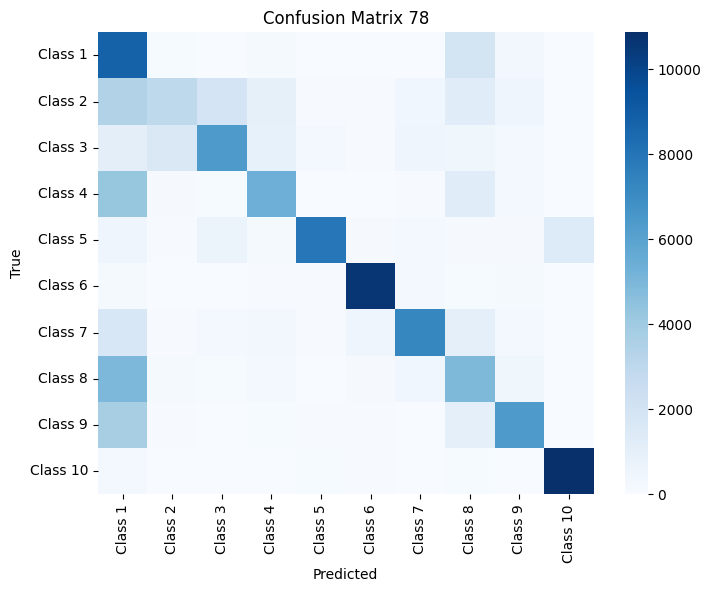

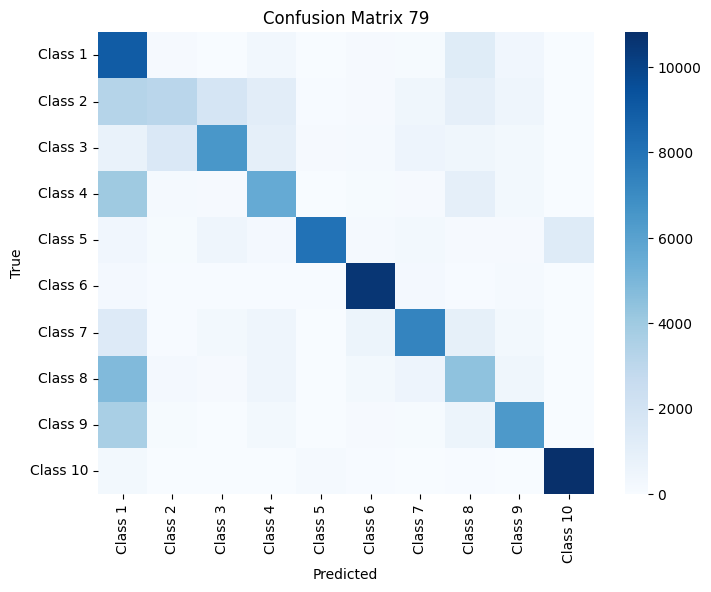

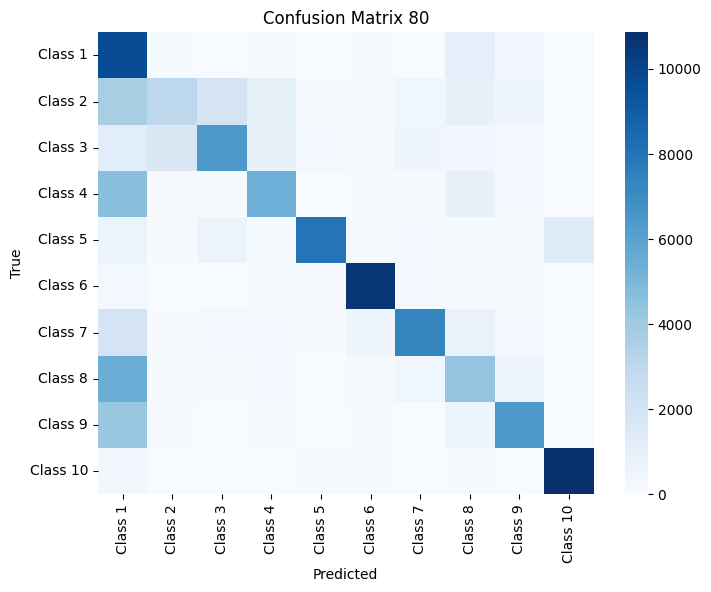

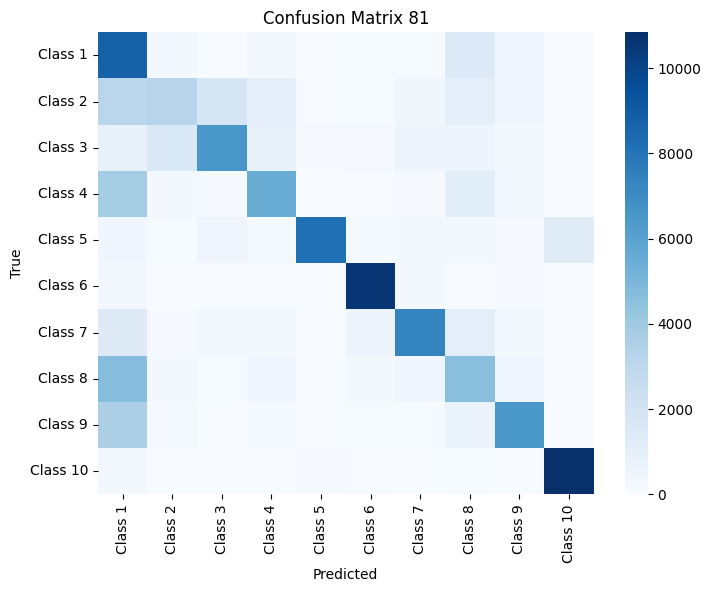

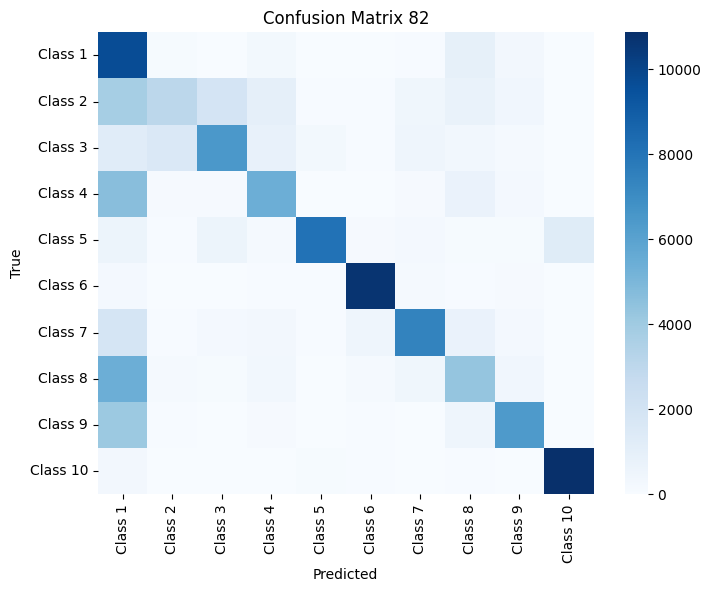

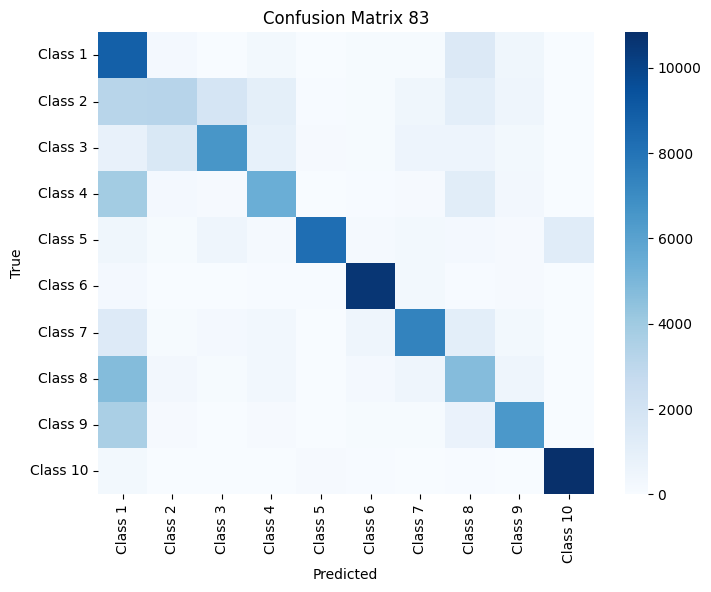

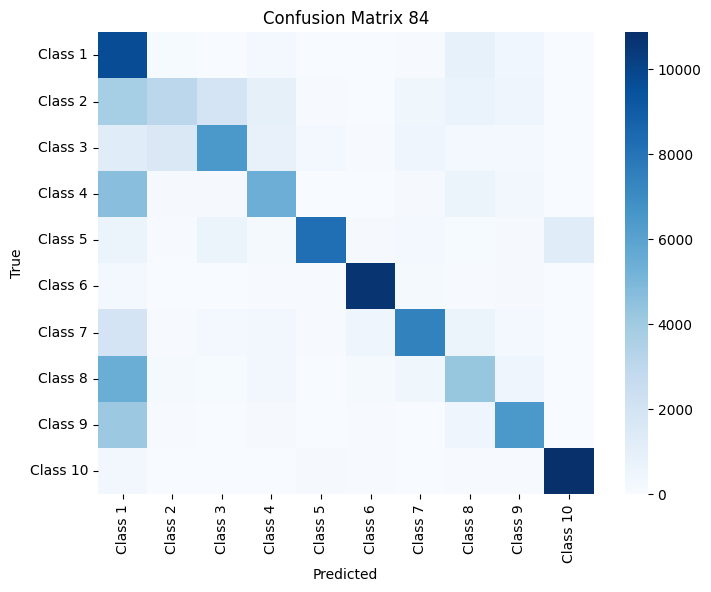

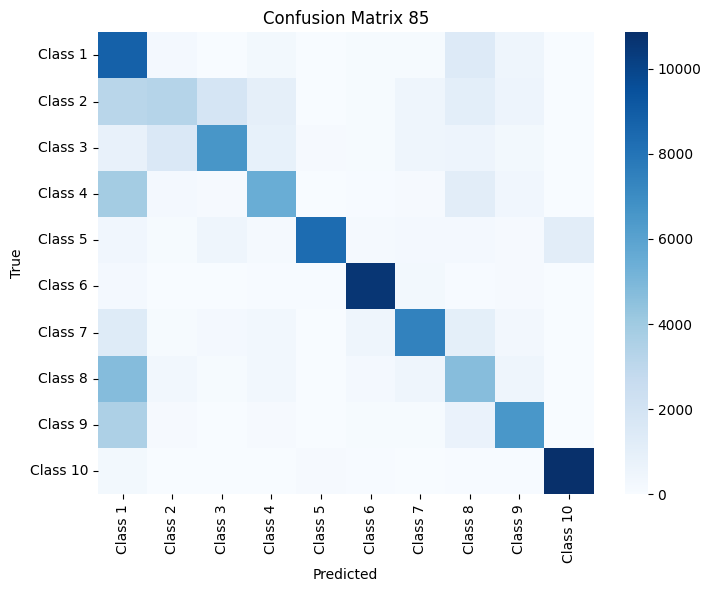

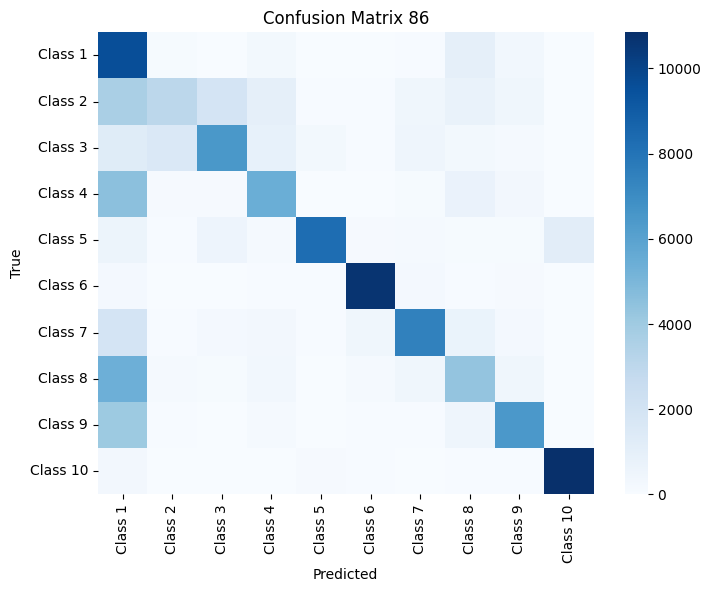

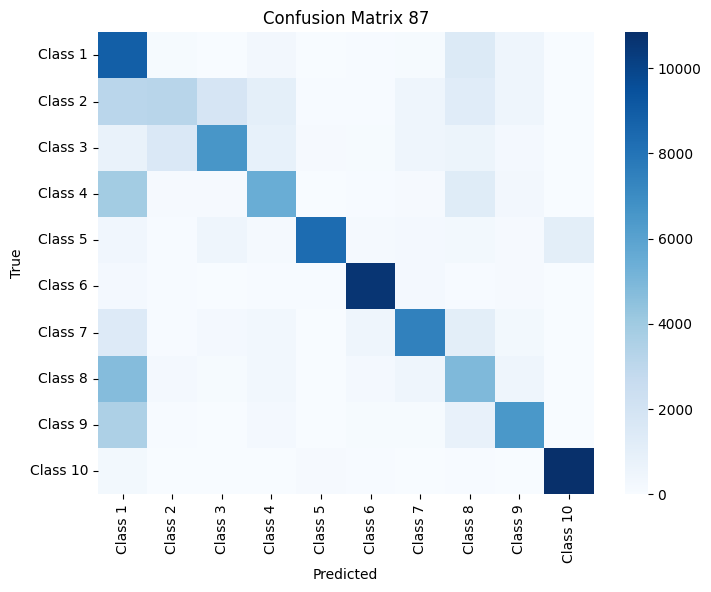

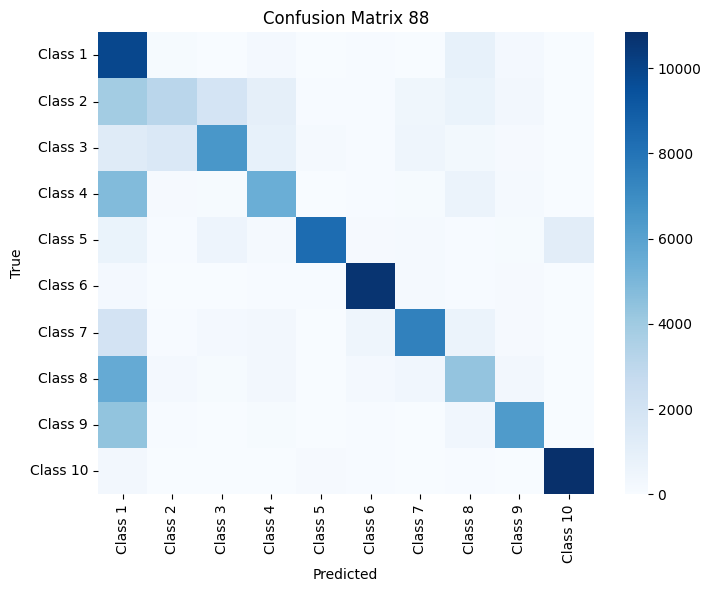

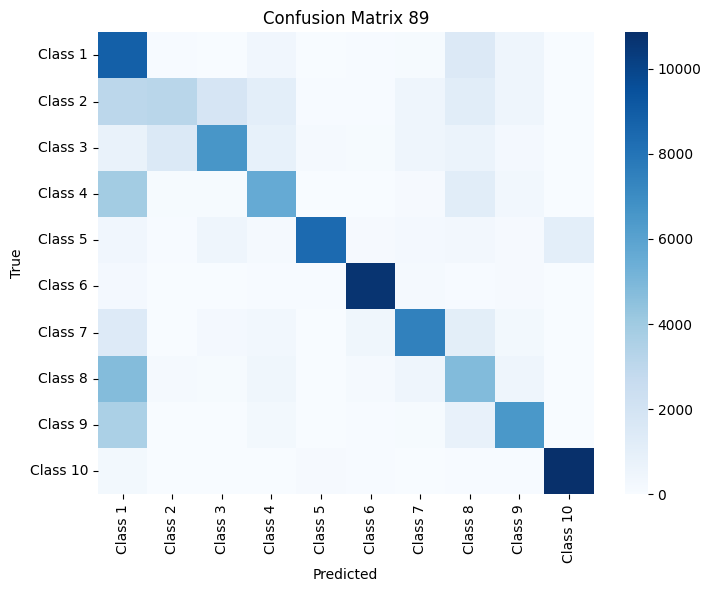

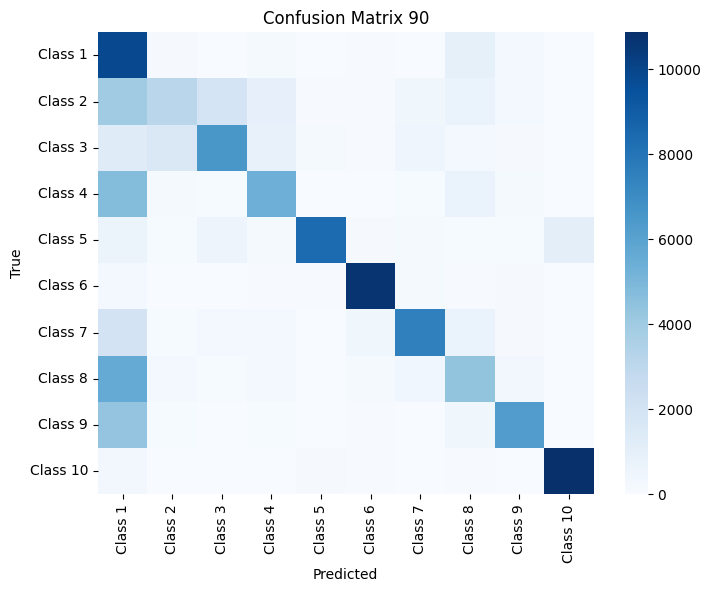

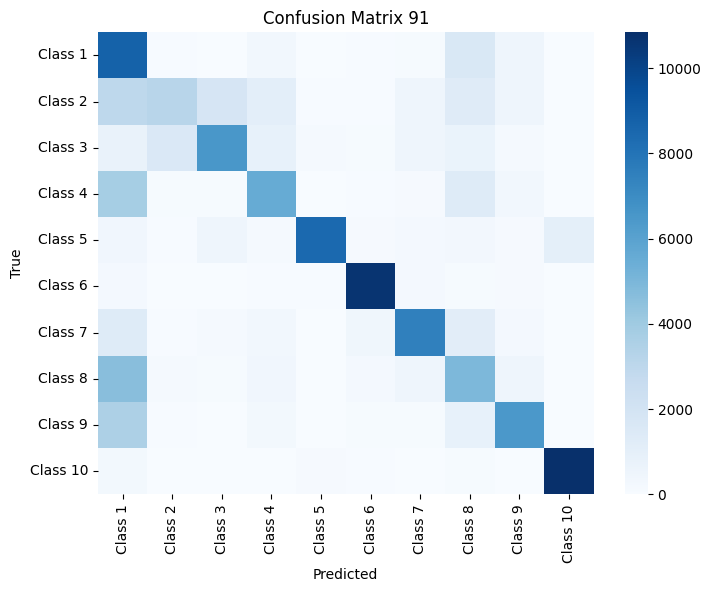

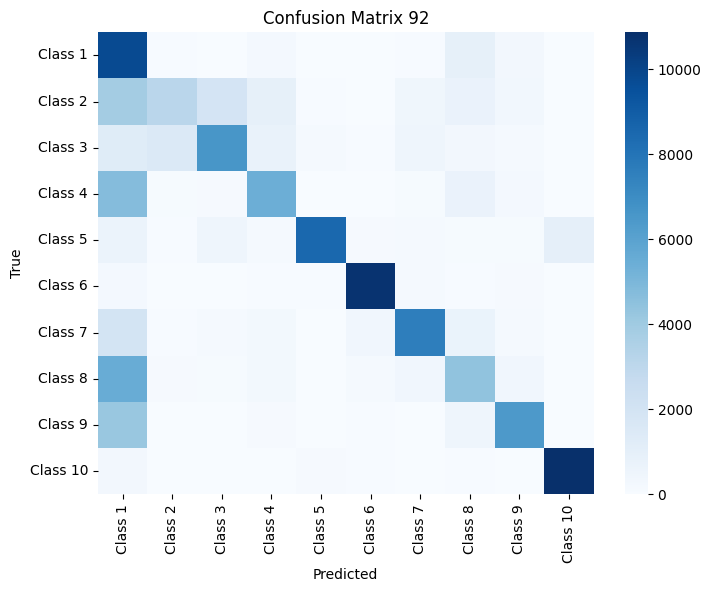

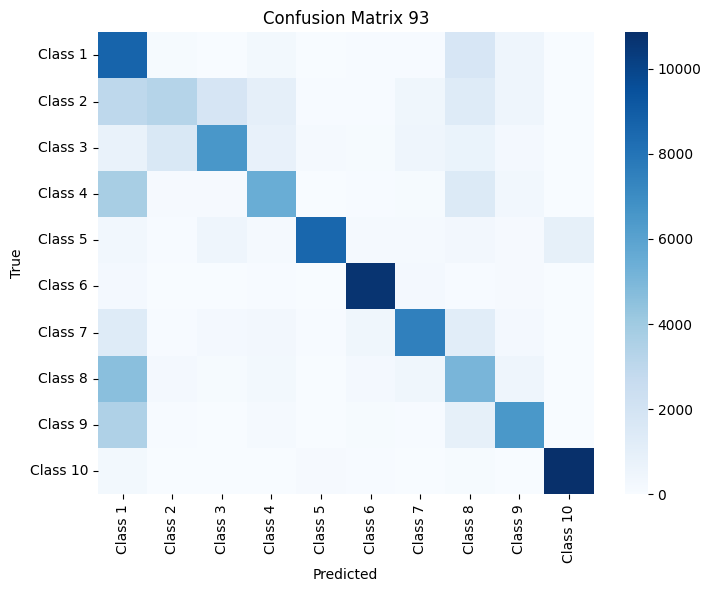

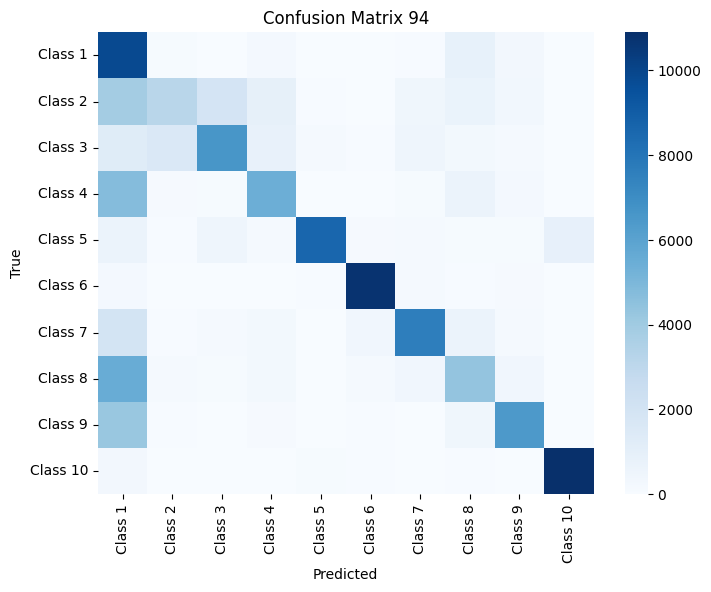

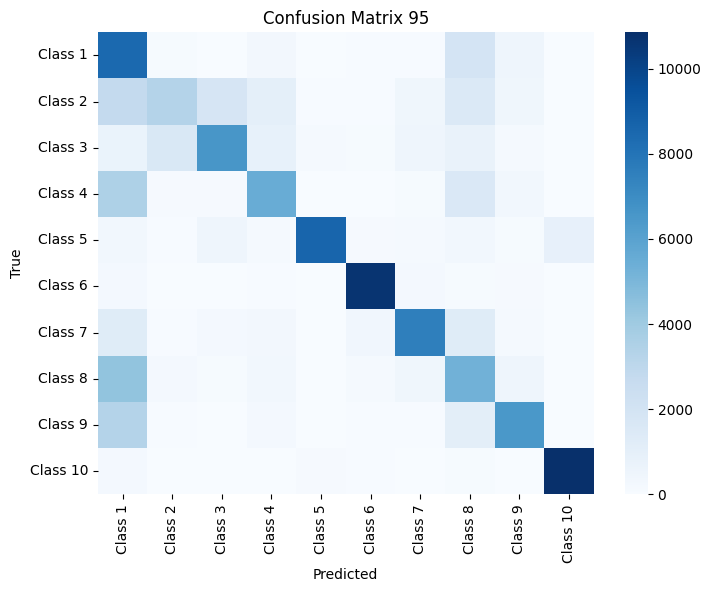

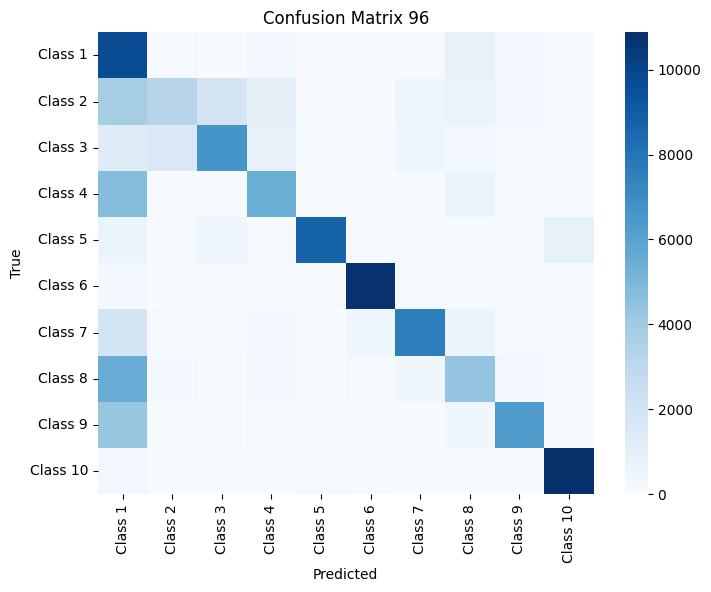

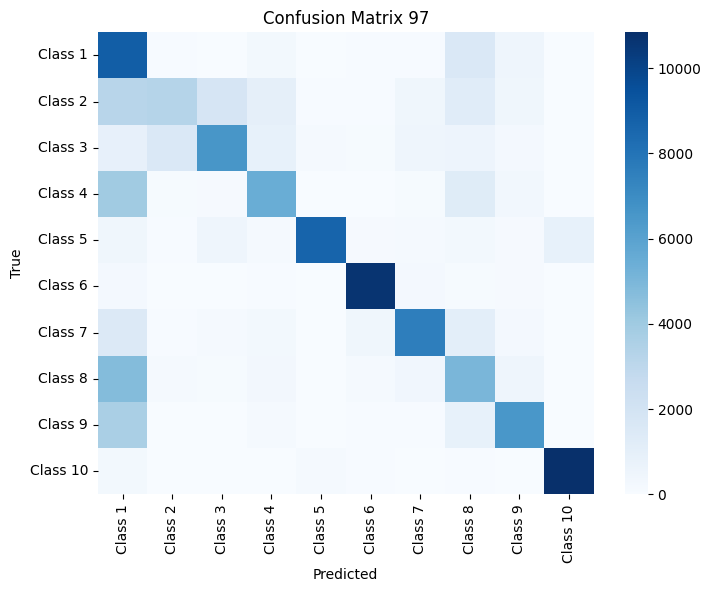

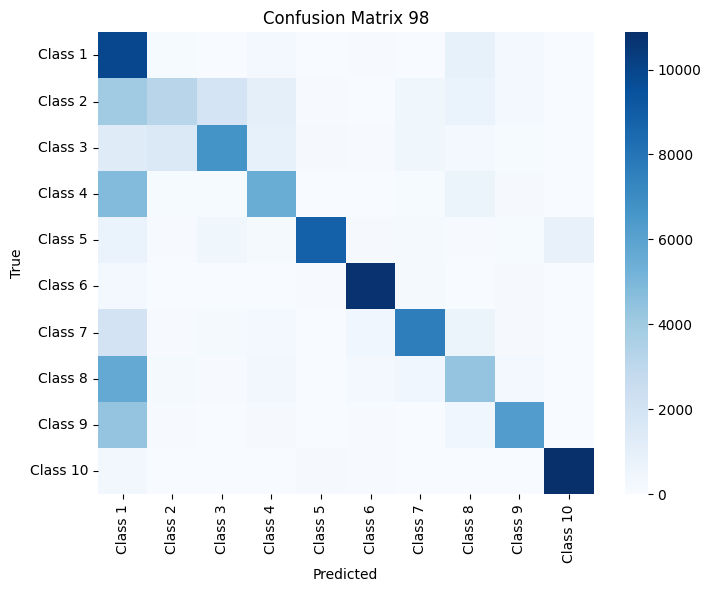

time: 47.7 s (started: 2023-11-11 21:47:28 +00:00)


In [12]:
#Class1=AC
#Class2=Dish washer
#Class3=Washing Machine	
#Class4=Dryer
#Class5=Water heater
#Class6=TV	
#Class7=Microwave
#Class8=Kettle
#Class9=Lighting
#Class10=Refrigerator


#plot all confusion matrices for all rounds(epochs)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a list of confusion matrices (replace this with your actual list)


# Get class labels
class_labels =  ['Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6','Class 7', 'Class 8', 'Class 9','Class 10']

# Plot each confusion matrix
for i, conf_matrix in enumerate(confusion_list):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix {i + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


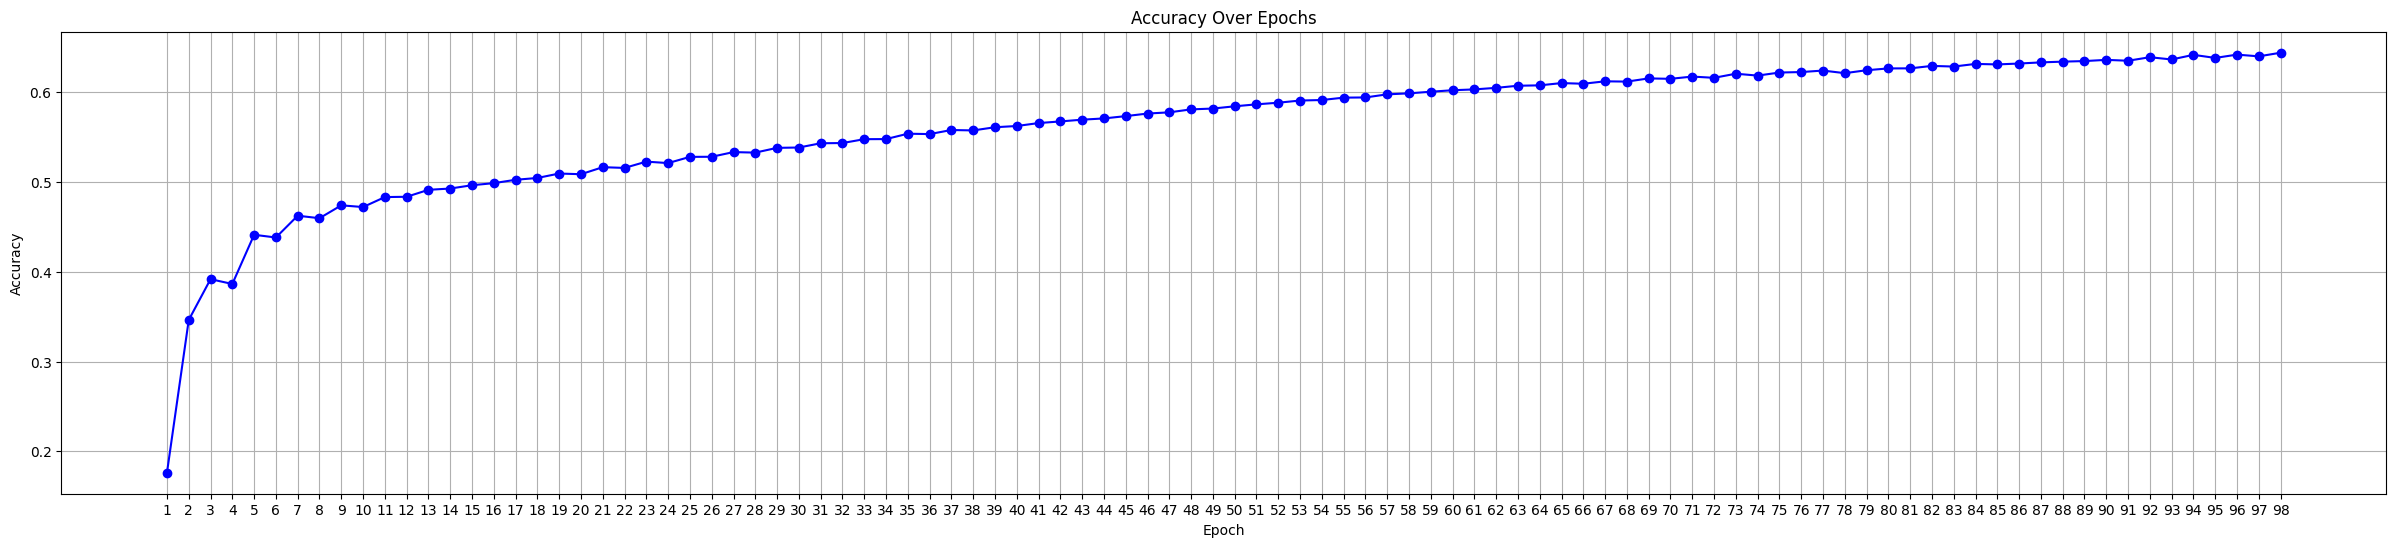

time: 752 ms (started: 2023-11-11 21:51:24 +00:00)


In [13]:
#Plot accuracy for all epochs for training process
%load_ext autotime

import matplotlib.pyplot as plt

# Assuming you have a list of accuracy values (replace this with your actual list)


# Generate x-axis labels (e.g., epoch numbers or any other relevant labels)
epoch_labels = [f'{i+1}' for i in range(len(accuracy_list))]

# Plot the accuracy values
plt.figure(figsize=(30, 6))
plt.plot(epoch_labels, accuracy_list, marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

# Show the plot
plt.grid(True)
plt.show()

In [14]:
#define evaluation setup
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

time: 4.08 s (started: 2023-11-11 21:51:32 +00:00)


In [15]:
#Evaluation setup
evaluation_state = evaluation_process.initialize()
model_weights = training_process.get_model_weights(train_state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

time: 203 ms (started: 2023-11-11 21:51:42 +00:00)


In [16]:
#Testset

input_data_list_test=[classification_processed_data[i][2].numpy() for i in range(50)]
target_data_list_test=[classification_processed_data[i][3].numpy() for i in range(50)]




# Create a tf.data.Dataset from the testset
def create_tf_dataset(input_data, target_data):
    dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
    return dataset

# Create client datasets
client_datasets = []
for i in range(NUM_CLIENTS):
    dataset = create_tf_dataset(input_data_list_test[i], target_data_list_test[i])
    dataset = dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(
        BATCH_SIZE).prefetch(PREFETCH_BUFFER)
    client_datasets.append(dataset)

federated_test_data = client_datasets

evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

time: 5.18 s (started: 2023-11-11 21:51:47 +00:00)


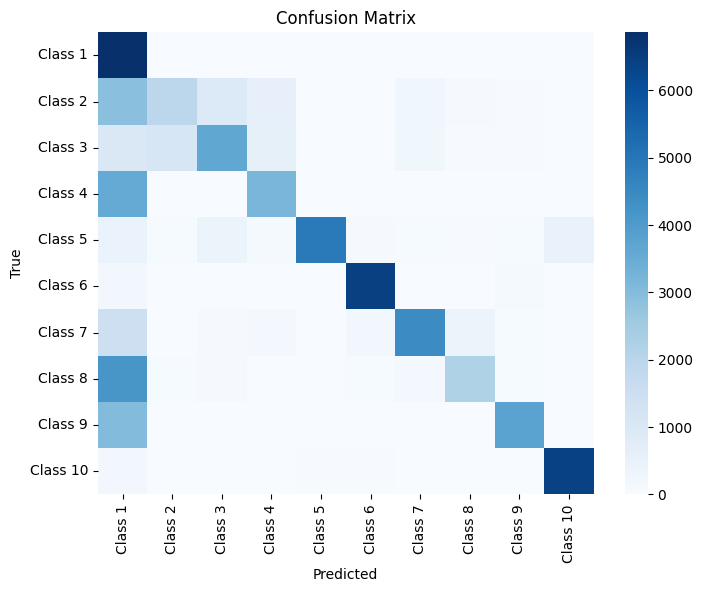

accuracy
0.6444853
time: 553 ms (started: 2023-11-11 21:51:56 +00:00)


In [17]:


#Class1=AC
#Class2=Dish washer
#Class3=Washing Machine	
#Class4=Dryer
#Class5=Water heater
#Class6=TV	
#Class7=Microwave
#Class8=Kettle
#Class9=Lighting
#Class10=Refrigerator

#compute and show confusion matrix for test also compute the accuracy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

evaluation_output[1]
evaluation_metrics = evaluation_output[1]['client_work']['eval']['total_rounds_metrics']

multiclass_true_positives = evaluation_metrics['multiclass_true_positives']



# Assuming you have a confusion matrix as a numpy array (replace this with your actual confusion matrix)
conf_matrix =  multiclass_true_positives

# Get class labels
class_labels = ['Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6','Class 7', 'Class 8', 'Class 9','Class 10']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("accuracy")
print(evaluation_metrics['sparse_categorical_accuracy'])